In [65]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#Code goes after this line by adding cells

# Task 1. Data Preparation

## 1.1 Data retrieving

### Import necessary libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

### Load data

In [67]:
#Load the file and rename the columns
data = pd.read_csv("StarWars.csv",sep = ',',header=None, encoding= 'unicode_escape')

### Check shape of data

In [68]:
# Get row and column count to compare with CSV file
data.shape

(1188, 38)

In [69]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,RespondentID,Have you seen any of the 6 films in the Star W...,Do you consider yourself to be a fan of the St...,Which of the following Star Wars films have yo...,NaN,NaN,NaN,NaN,NaN,Please rank the Star Wars films in order of pr...,...,NaN,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Ex...,Do you consider yourself to be a fan of the St...,Gender,Age,Household Income,Education,Location (Census Region)
1,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
2,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
4,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Correct shape of data

In [70]:
#Delete the first two rows as they represent dataset headers and are not respondent data
data=data.iloc[2:]

In [71]:
#Show first five rows post above transformation
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
2,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
4,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
5,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [72]:
#Reset index to 0 and drop the old index
data=data.reset_index(drop=True)

### Rename columns

In [73]:
data.columns=['Respondent ID','Watched any Star Wars film','Fan Star Wars','Watched episode 1','Watched episode 2','Watched episode 3','Watched episode 4','Watched episode 5','Watched episode 6','Rank episode 1','Rank episode 2','Rank episode 3','Rank episode 4','Rank episode 5','Rank episode 6','View Han Solo','View Luke Skywalker','View Princess Leia Organa','View Anakin Skywalker','View Obi Wan Kenobi','View Emperor Palpatine','View Darth Vader','View Lando Calrissian','View Boba Fett','View C-3P0','View R2 D2','View Jar Jar Binks','View Padme Amidala','View Yoda','Character shot first','Familiar with Expanded Universe','Fan Expanded Universe','Fan Star Trek','Respondent Gender','Respondent Age','Respondent Household Income','Respondent Education','Respondent Location']

In [74]:
#Get row and column count
data.shape

(1186, 38)

In [75]:
#Show first five rows post above transformation
data.head()

,Respondent ID,Watched any Star Wars film,Fan Star Wars,Watched episode 1,Watched episode 2,Watched episode 3,Watched episode 4,Watched episode 5,Watched episode 6,Rank episode 1,...,View Yoda,Character shot first,Familiar with Expanded Universe,Fan Expanded Universe,Fan Star Trek,Respondent Gender,Respondent Age,Respondent Household Income,Respondent Education,Respondent Location
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## 1.2 Check data types

In [76]:
#Print data types of columns
print(data.dtypes)

print("")

for column in data.columns:
    print(column)
    print(type(data[column][5]))

Respondent ID                      object
Watched any Star Wars film         object
Fan Star Wars                      object
Watched episode 1                  object
Watched episode 2                  object
Watched episode 3                  object
Watched episode 4                  object
Watched episode 5                  object
Watched episode 6                  object
Rank episode 1                     object
Rank episode 2                     object
Rank episode 3                     object
Rank episode 4                     object
Rank episode 5                     object
Rank episode 6                     object
View Han Solo                      object
View Luke Skywalker                object
View Princess Leia Organa          object
View Anakin Skywalker              object
View Obi Wan Kenobi                object
View Emperor Palpatine             object
View Darth Vader                   object
View Lando Calrissian              object
View Boba Fett                    

## 1.3 Typos - checking and correction

In [77]:
#Create a list of column names
column_headers = list(data.columns)
print(column_headers)

['Respondent ID', 'Watched any Star Wars film', 'Fan Star Wars', 'Watched episode 1', 'Watched episode 2', 'Watched episode 3', 'Watched episode 4', 'Watched episode 5', 'Watched episode 6', 'Rank episode 1', 'Rank episode 2', 'Rank episode 3', 'Rank episode 4', 'Rank episode 5', 'Rank episode 6', 'View Han Solo', 'View Luke Skywalker', 'View Princess Leia Organa', 'View Anakin Skywalker', 'View Obi Wan Kenobi', 'View Emperor Palpatine', 'View Darth Vader', 'View Lando Calrissian', 'View Boba Fett', 'View C-3P0', 'View R2 D2', 'View Jar Jar Binks', 'View Padme Amidala', 'View Yoda', 'Character shot first', 'Familiar with Expanded Universe', 'Fan Expanded Universe', 'Fan Star Trek', 'Respondent Gender', 'Respondent Age', 'Respondent Household Income', 'Respondent Education', 'Respondent Location']


In [78]:
#View distinct values in all columns and their frequency of occurence to inspect data for typos and data errors
for column_name in column_headers:
    print(data[column_name].value_counts())

3291262515    1
3288613051    1
3290292697    1
3289730973    1
3288653332    1
             ..
3291092094    1
3288580684    1
3288614671    1
3291431939    1
3289341349    1
Name: Respondent ID, Length: 1186, dtype: int64
Yes     935
No      250
Yes       1
Name: Watched any Star Wars film, dtype: int64
Yes     551
No      283
Noo       1
Yess      1
Name: Fan Star Wars, dtype: int64
Star Wars: Episode I  The Phantom Menace    673
Name: Watched episode 1, dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: Watched episode 2, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: Watched episode 3, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: Watched episode 4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: Watched episode 5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: Watched episode 6, dtype: int64
4    237
6    168
3    130
1    129
5    100
2     71
Name: Rank episode 1, dtype: int64
5  

In [79]:
#Correct misspellings of 'Yes' and 'No' in columns 'Fan Star Wars', 'Fan Expanded Universe' and 'Fan Star Trek'
#This is better than using the replace() function as it can correct more variations of misspellings
searchspace_yes='YES'
searchspace_no='NO'
fan_franchise_typos=['Fan Star Wars', 'Fan Expanded Universe', 'Fan Star Trek']
for columns in fan_franchise_typos:
    for value in range(len(data)):
            if searchspace_yes in str(data[columns][value]).upper():
                data[columns][value]='Yes'
            else:
                if searchspace_no in str(data[columns][value]).upper():
                    data[columns][value]='No'

In [80]:
#Update values of gender indicating male to 'Male' and female to 'Female' in the column 'Respondent Gender'
for value in range(len(data)):
            if 'F' in str(data['Respondent Gender'][value]).upper():
                data['Respondent Gender'][value]='Female'
            else:
                if 'M' in str(data['Respondent Gender'][value]).upper():
                    data['Respondent Gender'][value]='Male'

In [81]:
#Update values in the watched episde columns to YES / NO
watched_episode_n = ['Watched episode 1','Watched episode 2','Watched episode 3','Watched episode 4','Watched episode 5','Watched episode 6']

searchspace = "STAR WARS"
for columns in watched_episode_n:
    for values in range(len(data)):
        if (data['Watched any Star Wars film'][values].upper()=="YES") and (searchspace in str(data[columns][values]).upper()):
            data[columns][values]="Yes"
        else:
            data[columns][values]="No"

In [82]:
#Print unique values in all columns to inspect contents after correction of typos
for column_name in column_headers:
    print(data[column_name].value_counts())

3291262515    1
3288613051    1
3290292697    1
3289730973    1
3288653332    1
             ..
3291092094    1
3288580684    1
3288614671    1
3291431939    1
3289341349    1
Name: Respondent ID, Length: 1186, dtype: int64
Yes     935
No      250
Yes       1
Name: Watched any Star Wars film, dtype: int64
Yes    552
No     284
Name: Fan Star Wars, dtype: int64
Yes    673
No     513
Name: Watched episode 1, dtype: int64
No     615
Yes    571
Name: Watched episode 2, dtype: int64
No     636
Yes    550
Name: Watched episode 3, dtype: int64
Yes    607
No     579
Name: Watched episode 4, dtype: int64
Yes    757
No     429
Name: Watched episode 5, dtype: int64
Yes    737
No     449
Name: Watched episode 6, dtype: int64
4    237
6    168
3    130
1    129
5    100
2     71
Name: Rank episode 1, dtype: int64
5    300
4    183
2    116
3    103
6    102
1     32
Name: Rank episode 2, dtype: int64
6    217
5    203
4    182
3    150
2     47
1     36
Name: Rank episode 3, dtype: int64
1    204
6

In [83]:
data

,Respondent ID,Watched any Star Wars film,Fan Star Wars,Watched episode 1,Watched episode 2,Watched episode 3,Watched episode 4,Watched episode 5,Watched episode 6,Rank episode 1,...,View Yoda,Character shot first,Familiar with Expanded Universe,Fan Expanded Universe,Fan Star Trek,Respondent Gender,Respondent Age,Respondent Household Income,Respondent Education,Respondent Location
0,3292879998,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,No,No,No,No,No,No,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Yes,Yes,Yes,No,No,No,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,No,NaN,No,No,No,No,No,No,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


## 1.4 Treating extra whitespaces

In [84]:
#Remove whitespaces from both sides
for column_name in column_headers: 
    data[column_name]=data[column_name].str.strip()

In [85]:
#Print unique values in all columns to inspect contents after removal of extra whitespaces
for column_name in column_headers:
    print(data[column_name].value_counts())

3291262515    1
3288613051    1
3290292697    1
3289730973    1
3288653332    1
             ..
3291092094    1
3288580684    1
3288614671    1
3291431939    1
3289341349    1
Name: Respondent ID, Length: 1186, dtype: int64
Yes    936
No     250
Name: Watched any Star Wars film, dtype: int64
Yes    552
No     284
Name: Fan Star Wars, dtype: int64
Yes    673
No     513
Name: Watched episode 1, dtype: int64
No     615
Yes    571
Name: Watched episode 2, dtype: int64
No     636
Yes    550
Name: Watched episode 3, dtype: int64
Yes    607
No     579
Name: Watched episode 4, dtype: int64
Yes    757
No     429
Name: Watched episode 5, dtype: int64
Yes    737
No     449
Name: Watched episode 6, dtype: int64
4    237
6    168
3    130
1    129
5    100
2     71
Name: Rank episode 1, dtype: int64
5    300
4    183
2    116
3    103
6    102
1     32
Name: Rank episode 2, dtype: int64
6    217
5    203
4    182
3    150
2     47
1     36
Name: Rank episode 3, dtype: int64
1    204
6    161
2    1

## 1.5 Cast data to upper case

In [86]:
#Convert all text to upper case
#As aggregations don't have to be performed on Respondent ID and Rank Series 1 - Rank Series 6, and Respondent Age is an interval column, these should be retained as 'object')
for column_name in column_headers: 
    data[column_name] = data[column_name].str.upper() 

data.head()

,Respondent ID,Watched any Star Wars film,Fan Star Wars,Watched episode 1,Watched episode 2,Watched episode 3,Watched episode 4,Watched episode 5,Watched episode 6,Rank episode 1,...,View Yoda,Character shot first,Familiar with Expanded Universe,Fan Expanded Universe,Fan Star Trek,Respondent Gender,Respondent Age,Respondent Household Income,Respondent Education,Respondent Location
0,3292879998,YES,YES,YES,YES,YES,YES,YES,YES,3,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
1,3292879538,NO,NaN,NO,NO,NO,NO,NO,NO,NaN,...,NaN,NaN,NaN,NaN,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL
2,3292765271,YES,NO,YES,YES,YES,NO,NO,NO,1,...,UNFAMILIAR (N/A),I DON'T UNDERSTAND THIS QUESTION,NO,NaN,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL
3,3292763116,YES,YES,YES,YES,YES,YES,YES,YES,5,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
4,3292731220,YES,YES,YES,YES,YES,YES,YES,YES,5,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL


## 1.6 Sanity Checks

### 1.6.1 Check if respondent's age falls outside the common age buckets

In [87]:
#Print respondent ID if age bucket of respondent is not in the most common buckets or is not NaN
for value in range(len(data)):
    if data['Respondent Age'][value] not in ['18-29','30-44','45-60','> 60',np.NaN]:
        print("Age of respondent with ID "+data['Respondent ID'][value]+ " is " + data['Respondent Age'][value] + ", not in common age buckets. Check age.")

Age of respondent with ID 3292609214 is 500, not in common age buckets. Check age.


#### Drop row with age = 500

In [88]:
#Remove the row where the respondent's recorded age is 500 as it is an obvious error
#Also take row count before and after the change to make sure only one row is deleted
print("Rows before deleting record of age 500: "+str(len(data)))

data.drop(data[data['Respondent Age']=='500'].index, inplace=True)
print("Rows after deleting record of age 500: "+str(len(data)))

Rows before deleting record of age 500: 1186
Rows after deleting record of age 500: 1185


In [89]:
#Reset index to 0 and drop the old index
data=data.reset_index(drop=True)

In [90]:
#Print content and counts of values in 'Respondent Age' post elimination of incorrect record
print(data['Respondent Age'].value_counts())

45-60    291
> 60     269
30-44    268
18-29    217
Name: Respondent Age, dtype: int64


### 1.6.2 Check that if a respondent has not watched any Star Wars films, the value in individual film columns is 'No'

In [91]:
#Block below should print nothing if a respondent has not watched any Star Wars movie and not stated otherwise in the individual 'Watched episode (1-6)' columns

for values in range(len(data)):
    if (data["Watched any Star Wars film"][values]=="NO"):
        for columns in watched_episode_n:
             if (data[columns][values]!="NO"):
                print(str(values)+" - "+str(columns)) 

### 1.6.3 Check that if a respondent has not watched any Star Wars movies, then he/she has also not ranked any film

In [92]:
#Block below should print nothing if a respondent has not watched any Star Wars movie and not ranked any of the 'Watched episode (1-6)' columns

rank_episode_n = ['Rank episode 1','Rank episode 2','Rank episode 3','Rank episode 4','Rank episode 5','Rank episode 6']

for values in range(len(data)):
    if (data["Watched any Star Wars film"][values]=="NO"):
        for columns in rank_episode_n:
            if (np.isnan(data[columns][values])) == False:
                print(str(values)+" - "+str(columns))

### 1.6.4 Check that if a respondent has not watched any Star Wars movies, then he/she has not shared view on any character

In [93]:
# List the names of columns that have character views
characters = ['View Han Solo','View Luke Skywalker','View Princess Leia Organa','View Anakin Skywalker','View Obi Wan Kenobi','View Emperor Palpatine','View Darth Vader','View Lando Calrissian','View Boba Fett','View C-3P0','View R2 D2', 'View Jar Jar Binks', 'View Padme Amidala', 'View Yoda']

In [94]:
# The code below will not print anything if people who have not watched any Star Wars films have not shared views on any characters
for respondent in range(len(data['Respondent ID'])):
    for view in characters:
        if data['Watched any Star Wars film'][respondent] == 'NO' and data[view][respondent]!="NOT ANSWERED":
            print(data['Respondent ID'][respondent] + " - not watched but shared view on character")

3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292879538 - not watched but shared view on character
3292635062 - not watched but shared view on character
3292635062 - not watched but shared view on character
3292635062 - not watched but shared view on character
3292635062 - not watched but shared view on character
3292635062 - not watched but

3291009055 - not watched but shared view on character
3291009055 - not watched but shared view on character
3291009055 - not watched but shared view on character
3291009055 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3291001879 - not watched but shared view on character
3290998457 - not watched but

3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290893301 - not watched but shared view on character
3290874545 - not watched but shared view on character
3290874545 - not watched but shared view on character
3290874545 - not watched but shared view on character
3290874545 - not watched but shared view on character
3290874545 - not watched but

3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290359700 - not watched but shared view on character
3290358751 - not watched but shared view on character
3290358751 - not watched but shared view on character
3290358751 - not watched but shared view on character
3290358751 - not watched but shared view on character
3290358751 - not watched but shared view on character
3290358751 - not watched but shared view on character
3290358751 - not watched but shared view on character
3290358751 - not watched but

3290174629 - not watched but shared view on character
3290174629 - not watched but shared view on character
3290174629 - not watched but shared view on character
3290174629 - not watched but shared view on character
3290174629 - not watched but shared view on character
3290174629 - not watched but shared view on character
3290174629 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but shared view on character
3290159455 - not watched but

3289753279 - not watched but shared view on character
3289753279 - not watched but shared view on character
3289753279 - not watched but shared view on character
3289753279 - not watched but shared view on character
3289753279 - not watched but shared view on character
3289753279 - not watched but shared view on character
3289753279 - not watched but shared view on character
3289753279 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but shared view on character
3289745316 - not watched but

3289463626 - not watched but shared view on character
3289463626 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289437997 - not watched but shared view on character
3289419064 - not watched but shared view on character
3289419064 - not watched but shared view on character
3289419064 - not watched but

3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288613051 - not watched but shared view on character
3288601827 - not watched but shared view on character
3288601827 - not watched but shared view on character
3288601827 - not watched but shared view on character
3288601827 - not watched but shared view on character
3288601827 - not watched but

3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288421819 - not watched but shared view on character
3288410073 - not watched but shared view on character
3288410073 - not watched but shared view on character
3288410073 - not watched but shared view on character
3288410073 - not watched but shared view on character
3288410073 - not watched but shared view on character
3288410073 - not watched but shared view on character
3288410073 - not watched but shared view on character
3288410073 - not watched but

In [95]:
# Print the data
data

,Respondent ID,Watched any Star Wars film,Fan Star Wars,Watched episode 1,Watched episode 2,Watched episode 3,Watched episode 4,Watched episode 5,Watched episode 6,Rank episode 1,...,View Yoda,Character shot first,Familiar with Expanded Universe,Fan Expanded Universe,Fan Star Trek,Respondent Gender,Respondent Age,Respondent Household Income,Respondent Education,Respondent Location
0,3292879998,YES,YES,YES,YES,YES,YES,YES,YES,3,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
1,3292879538,NO,NaN,NO,NO,NO,NO,NO,NO,NaN,...,NaN,NaN,NaN,NaN,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL
2,3292765271,YES,NO,YES,YES,YES,NO,NO,NO,1,...,UNFAMILIAR (N/A),I DON'T UNDERSTAND THIS QUESTION,NO,NaN,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL
3,3292763116,YES,YES,YES,YES,YES,YES,YES,YES,5,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
4,3292731220,YES,YES,YES,YES,YES,YES,YES,YES,5,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,3288388730,YES,YES,YES,YES,YES,YES,YES,YES,5,...,VERY FAVORABLY,HAN,NO,NaN,YES,FEMALE,18-29,"$0 - $24,999",SOME COLLEGE OR ASSOCIATE DEGREE,EAST NORTH CENTRAL
1181,3288378779,YES,YES,YES,YES,YES,YES,YES,YES,4,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,FEMALE,30-44,"$50,000 - $99,999",BACHELOR DEGREE,MOUNTAIN
1182,3288375286,NO,NaN,NO,NO,NO,NO,NO,NO,NaN,...,NaN,NaN,NaN,NaN,NO,FEMALE,30-44,"$50,000 - $99,999",BACHELOR DEGREE,MIDDLE ATLANTIC
1183,3288373068,YES,YES,YES,YES,YES,YES,YES,YES,4,...,VERY FAVORABLY,HAN,NO,NaN,YES,FEMALE,45-60,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,EAST NORTH CENTRAL


## 1.7 Missing values

In [96]:
# Replace NaN with 'NOT ANSWERED' except in the episode rank columns as they are used for calculating weighted average

for column in range(len(data.columns)):
    if ((data.columns[column]) not in rank_episode_n):
        data[data.columns[column]].fillna(value = "NOT ANSWERED", inplace = True)

In [97]:
data

,Respondent ID,Watched any Star Wars film,Fan Star Wars,Watched episode 1,Watched episode 2,Watched episode 3,Watched episode 4,Watched episode 5,Watched episode 6,Rank episode 1,...,View Yoda,Character shot first,Familiar with Expanded Universe,Fan Expanded Universe,Fan Star Trek,Respondent Gender,Respondent Age,Respondent Household Income,Respondent Education,Respondent Location
0,3292879998,YES,YES,YES,YES,YES,YES,YES,YES,3,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NOT ANSWERED,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
1,3292879538,NO,NOT ANSWERED,NO,NO,NO,NO,NO,NO,NaN,...,NOT ANSWERED,NOT ANSWERED,NOT ANSWERED,NOT ANSWERED,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL
2,3292765271,YES,NO,YES,YES,YES,NO,NO,NO,1,...,UNFAMILIAR (N/A),I DON'T UNDERSTAND THIS QUESTION,NO,NOT ANSWERED,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL
3,3292763116,YES,YES,YES,YES,YES,YES,YES,YES,5,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NOT ANSWERED,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
4,3292731220,YES,YES,YES,YES,YES,YES,YES,YES,5,...,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,3288388730,YES,YES,YES,YES,YES,YES,YES,YES,5,...,VERY FAVORABLY,HAN,NO,NOT ANSWERED,YES,FEMALE,18-29,"$0 - $24,999",SOME COLLEGE OR ASSOCIATE DEGREE,EAST NORTH CENTRAL
1181,3288378779,YES,YES,YES,YES,YES,YES,YES,YES,4,...,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NOT ANSWERED,YES,FEMALE,30-44,"$50,000 - $99,999",BACHELOR DEGREE,MOUNTAIN
1182,3288375286,NO,NOT ANSWERED,NO,NO,NO,NO,NO,NO,NaN,...,NOT ANSWERED,NOT ANSWERED,NOT ANSWERED,NOT ANSWERED,NO,FEMALE,30-44,"$50,000 - $99,999",BACHELOR DEGREE,MIDDLE ATLANTIC
1183,3288373068,YES,YES,YES,YES,YES,YES,YES,YES,4,...,VERY FAVORABLY,HAN,NO,NOT ANSWERED,YES,FEMALE,45-60,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,EAST NORTH CENTRAL


In [98]:
# Task 2: Data Exploration
# 1. Explore the survey question: \textit{Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I  The Phantom Menace; Star Wars: Episode II  Attack of the Clones; Star Wars: Episode III  Revenge of the Sith;	Star Wars: Episode IV  A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)}, then analysis how people rate Star Wars Movies. 

#Code goes after this line by adding cells

# Task 2. Data Exploration

## Task 2.1 Explore the survey question: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.

In [99]:
# Create a column to store total number of episodes watched by a respondent
data['Total watched'] = 0 

for respondent in range(len(data['Respondent ID'])):
    for episode in watched_episode_n:            
        if (data[episode][respondent] == "YES"):
            data['Total watched'][respondent] = data['Total watched'][respondent] + 1   
            
data

/Users/saumyasinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Respondent ID,Watched any Star Wars film,Fan Star Wars,Watched episode 1,Watched episode 2,Watched episode 3,Watched episode 4,Watched episode 5,Watched episode 6,Rank episode 1,...,Character shot first,Familiar with Expanded Universe,Fan Expanded Universe,Fan Star Trek,Respondent Gender,Respondent Age,Respondent Household Income,Respondent Education,Respondent Location,Total watched
0,3292879998,YES,YES,YES,YES,YES,YES,YES,YES,3,...,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NOT ANSWERED,HIGH SCHOOL DEGREE,SOUTH ATLANTIC,6
1,3292879538,NO,NOT ANSWERED,NO,NO,NO,NO,NO,NO,NaN,...,NOT ANSWERED,NOT ANSWERED,NOT ANSWERED,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL,0
2,3292765271,YES,NO,YES,YES,YES,NO,NO,NO,1,...,I DON'T UNDERSTAND THIS QUESTION,NO,NOT ANSWERED,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL,3
3,3292763116,YES,YES,YES,YES,YES,YES,YES,YES,5,...,I DON'T UNDERSTAND THIS QUESTION,NO,NOT ANSWERED,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL,6
4,3292731220,YES,YES,YES,YES,YES,YES,YES,YES,5,...,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,3288388730,YES,YES,YES,YES,YES,YES,YES,YES,5,...,HAN,NO,NOT ANSWERED,YES,FEMALE,18-29,"$0 - $24,999",SOME COLLEGE OR ASSOCIATE DEGREE,EAST NORTH CENTRAL,6
1181,3288378779,YES,YES,YES,YES,YES,YES,YES,YES,4,...,I DON'T UNDERSTAND THIS QUESTION,NO,NOT ANSWERED,YES,FEMALE,30-44,"$50,000 - $99,999",BACHELOR DEGREE,MOUNTAIN,6
1182,3288375286,NO,NOT ANSWERED,NO,NO,NO,NO,NO,NO,NaN,...,NOT ANSWERED,NOT ANSWERED,NOT ANSWERED,NO,FEMALE,30-44,"$50,000 - $99,999",BACHELOR DEGREE,MIDDLE ATLANTIC,0
1183,3288373068,YES,YES,YES,YES,YES,YES,YES,YES,4,...,HAN,NO,NOT ANSWERED,YES,FEMALE,45-60,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,EAST NORTH CENTRAL,6


In [100]:
#Calculate weighted average of how people rank episodes

no_of_respondents = len(data[data['Watched any Star Wars film']=='YES'])

print("Number of respondents whose opinion counts: "+str(no_of_respondents))

def cal_weighted_avg(episode, rank, data):
    weighted_avg = 0
    for respondent in range(len(data['Respondent ID'])):
        if float(data[episode][respondent]) == rank:
            weighted_avg += 1 * (data['Total watched'][respondent]/6)
    return weighted_avg
            
cal_weighted_avg('Rank episode 1',1,data)            

Number of respondents whose opinion counts: 935


76.50000000000001

In [101]:
# Populating array

weighted_avg = np.zeros((6,6))
ranks = [1,2,3,4,5,6]
episodes = [1,2,3,4,5,6]

for episode in range(len(rank_episode_n)):
    for rank in ranks:
        weighted_avg[episode,rank-1] = cal_weighted_avg(rank_episode_n[episode], rank, data)

print(pd.DataFrame(weighted_avg, columns = ranks, index = episodes))

            1           2           3           4           5           6
1   76.500000   47.500000   84.166667  191.000000   92.000000  156.833333
2   24.500000   70.833333   76.000000  130.000000  252.500000   94.333333
3   31.666667   40.500000   97.166667  150.166667  149.166667  178.500000
4  173.833333  124.333333  108.166667   83.833333   49.833333  108.166667
5  225.833333  189.500000   92.166667   41.166667   72.666667   26.833333
6  115.833333  175.500000  190.500000   52.000000   32.000000   82.333333


Text(0, 0.5, 'Episode')

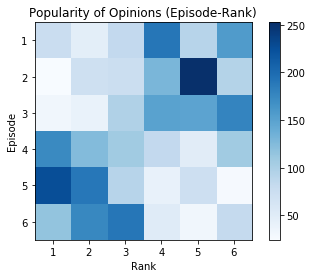

In [102]:
# Plot heatmap

plt.imshow(weighted_avg, cmap = 'Blues')
plt.colorbar()

plt.xticks(np.arange(6), (1,2,3,4,5,6))
plt.yticks(np.arange(6), (1,2,3,4,5,6))

plt.title('Popularity of Opinions (Episode-Rank)')
plt.xlabel('Rank') 
plt.ylabel('Episode')

In [103]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line by adding cells

## Task 2.2 Explore the relationships between columns. You need to choose 3 pairs of columns to focus on, and you need to generate 1 visualisation for each pair. Each pair of columns that you choose should address a plausible hypothesis for the data concerned.

### 2.2.1 All fans of Star Wars are also fans of Star Trek.

In [104]:
# Initialize 2-D array to store number of respondents by their response to 'Star Wars Fan' and 'Star Trek Fan'
no_of_fans = np.zeros((3,3))
print(no_of_fans) 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [105]:
# Count number respondents for a combination of the response to 'Star Wars Fan' and 'Star Trek Fan'
def is_a_fan(star_wars_fan, star_trek_fan, data):
    fans = 0
    for respondent in range(len(data['Respondent ID'])):
        if data['Fan Star Wars'][respondent] == star_wars_fan and data['Fan Star Trek'][respondent] == star_trek_fan:
            fans += 1
    return fans

is_a_fan('YES','YES',data)

370

In [106]:
# Loop through all combinations of the responsne to 'Star Wars Fan' and 'Star Trek Fan' and call function to update array

star_wars_fans = ['YES','NO', 'NOT ANSWERED']
star_trek_fans = ['YES','NO', 'NOT ANSWERED']

for star_wars_fan in range(len(star_wars_fans)):
    for star_trek_fan in range(len(star_trek_fans)):
        no_of_fans[star_wars_fan][star_trek_fan] = is_a_fan(star_wars_fans[star_wars_fan], star_trek_fans[star_trek_fan], data)

print(pd.DataFrame(no_of_fans, columns = star_trek_fans, index = star_wars_fans))

                YES     NO  NOT ANSWERED
YES           370.0  175.0           7.0
NO             45.0  237.0           1.0
NOT ANSWERED   12.0  228.0         110.0


Text(0, 0.5, 'Star Wars Fan')

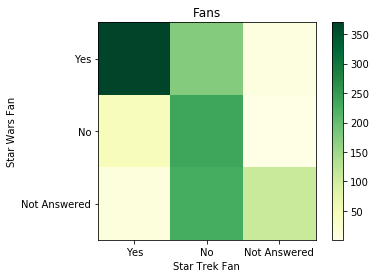

In [107]:
# Plot heatmap

plt.imshow(no_of_fans, cmap = 'YlGn')
plt.colorbar()

plt.xticks(np.arange(3), ('Yes','No','Not Answered'))
plt.yticks(np.arange(3), ('Yes','No','Not Answered'))

plt.title('Fans')
plt.xlabel('Star Trek Fan') 
plt.ylabel('Star Wars Fan')

### 2.2.2 Men and women have watched nearly equal number of Star Wars films.

In [108]:
# Initialize list of number of movies one could have watched (values between 0 and 6)
# Initialize number of females and number of males who have watched 0-6 movies

watched_count = list(range(0,7))
count_females = np.zeros(7)
count_males = np.zeros(7)

print(watched_count)
print(count_females)
print(count_males)

[0, 1, 2, 3, 4, 5, 6]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]


In [109]:
# Loop through all respondents and update number of respondents who have watched a certain number of movies by gender

for count in watched_count:
    no_females = 0
    no_males = 0
    for respondent in range(len(data['Respondent ID'])):
        if data['Respondent Gender'][respondent] == 'FEMALE' and data['Total watched'][respondent] == count: 
            no_females = no_females + 1
            count_females[count] = no_females
        if data['Respondent Gender'][respondent] == 'MALE' and data['Total watched'][respondent] == count: 
            no_males = no_males + 1
            count_males[count] = no_males

print(count_females)
print(count_males)

[153.  31.  60.  59.  41.  21. 184.]
[ 75.  24.  22.  37.  31.  29. 278.]


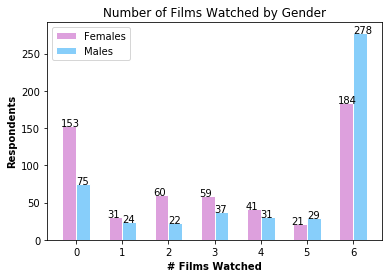

In [110]:
# Plot bar chart

barWidth = 0.3

x1 = np.arange(len(count_females))
x2 = [x + barWidth for x in x1]

plt.bar(x1, count_females, color='plum', width=barWidth, edgecolor='white', label='Females')
for i, v in enumerate(count_females):
    plt.text(i-0.18, v, int(v), color='black')

plt.bar(x2, count_males, color='lightskyblue', width=barWidth, edgecolor='white', label='Males')
for i, v in enumerate(count_males):
    plt.text(i+0.15, v, int(v), color='black')

plt.title('Number of Films Watched by Gender')
plt.xlabel('# Films Watched', fontweight='bold')
plt.ylabel('Respondents', fontweight='bold')
plt.xticks([x + barWidth/2 for x in range(len(count_females))], watched_count)

plt.legend()
plt.show()

### 2.2.3 There are more older viewers of Star Wars than younger viewers.


In [111]:
# Initialize arrays of age groups, number of viewers and number of non-viewers

age_group = data['Respondent Age'].unique()
print(age_group)

count_viewers = np.zeros(5)
print(count_viewers)

count_non_viewers = np.zeros(5)
print(count_non_viewers)

['18-29' 'NOT ANSWERED' '30-44' '> 60' '45-60']
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [112]:
# Loop through all respondents and update number of viewers and non-viewers by age group

for age in range(len(age_group)): 
    viewers = 0
    non_viewers = 0
    for respondent in range(len(data['Respondent ID'])):
        if data['Respondent Age'][respondent] == age_group[age] and data['Watched any Star Wars film'][respondent] == "YES":
            viewers = viewers + 1
            count_viewers[age] = viewers
        else:
            if data['Respondent Age'][respondent] == age_group[age] and data['Watched any Star Wars film'][respondent] == "NO":
                non_viewers = non_viewers + 1
                count_non_viewers[age] = non_viewers

print(count_viewers)
print(count_non_viewers)

[179. 116. 207. 193. 240.]
[38. 24. 61. 76. 51.]


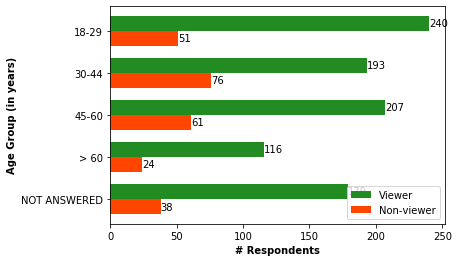

In [113]:
# Plot bar chart

barWidth = 0.35

p1 = plt.barh(np.arange(len(count_viewers))+barWidth, count_viewers, barWidth, color = 'forestgreen', label = 'Viewer')
for i, v in enumerate(count_viewers):
    plt.text(v, i+0.3, int(v))

    
p2 = plt.barh(np.arange(len(count_non_viewers)), count_non_viewers, barWidth, color = 'orangered', label = 'Non-viewer')
for i, v in enumerate(count_non_viewers):
    plt.text(v, i-0.075, int(v))
    
plt.ylabel('Age Group (in years)', fontweight='bold')
plt.xlabel('# Respondents', fontweight='bold')
plt.yticks(np.arange(len(count_viewers)) + barWidth/2, np.sort(age_group)[::-1])

plt.legend(loc=4)
plt.show()

In [114]:
# Task 2: Data Exploration
# 3. Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

#Code goes after this line by adding cells

## Task 2.3 Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

In [115]:
# Check number of people who have not watched any Star Wars film
data[data['Watched any Star Wars film'] == 'NO'].shape

(250, 39)

In [116]:
# As there are no respondents who have not watched a movie but shared views on characters, only consider the response of those respondents who have watched at least one Star Wars movie
data_watched = data[data['Watched any Star Wars film'] == 'YES']
data_watched = data_watched.reset_index(drop=True)

In [117]:
# List the names of all demography columns
demographics = ['Respondent Gender', 'Respondent Age', 'Respondent Household Income', 'Respondent Education', 'Respondent Location']


VIEW HAN SOLO BY RESPONDENT GENDER


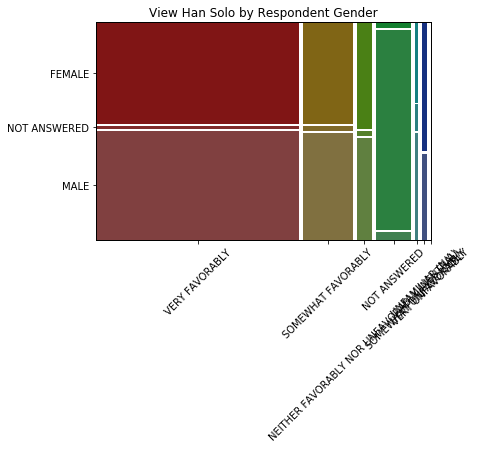


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 22             3   
MALE                                                   21             4   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        71                     3                 9   
MALE                          75                     4                 6   
NOT ANSWERED                   4                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   289                 0  
MALE                     311                 1  
NOT ANSWERED              10                 0  

VIEW LUKE SKYWALKER BY RESPONDENT GENDER


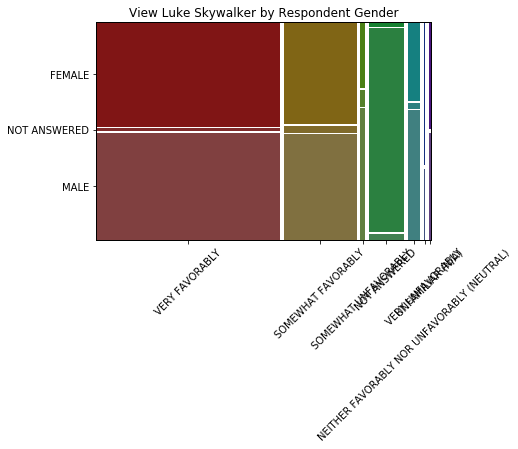


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 14             2   
MALE                                                   23             3   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                       104                     4                 3   
MALE                         108                     8                 3   
NOT ANSWERED                   7                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   268                 2  
MALE                     276                 1  
NOT ANSWERED               7                 0  

VIEW PRINCESS LEIA ORGANA BY RESPONDENT GENDER


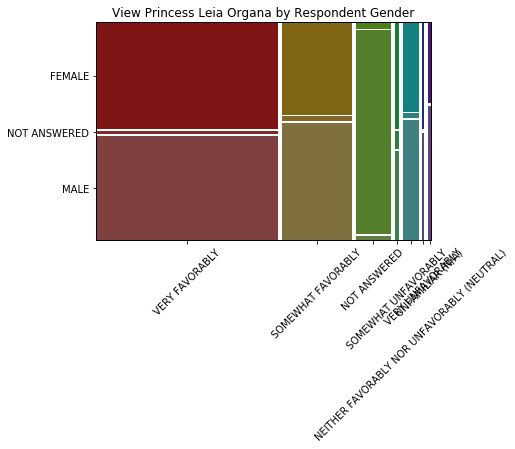


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 20             3   
MALE                                                   27             2   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        90                     6                 3   
MALE                         114                     5                 5   
NOT ANSWERED                   5                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   272                 3  
MALE                     266                 3  
NOT ANSWERED               9                 0  

VIEW ANAKIN SKYWALKER BY RESPONDENT GENDER


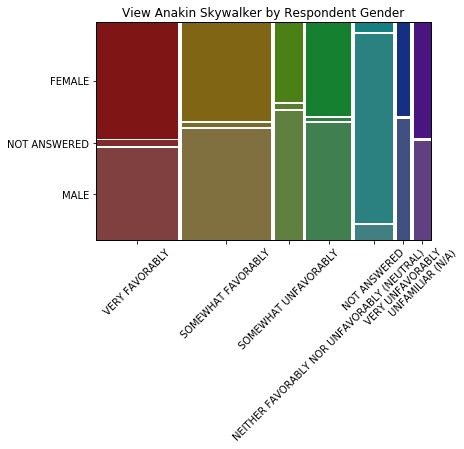


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 59             5   
MALE                                                   74             8   
NOT ANSWERED                                            2           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                       124                    31                28   
MALE                         139                    50                24   
NOT ANSWERED                   5                     2                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   133                17  
MALE                     105                22  
NOT ANSWERED               7                 0  

VIEW OBI WAN KENOBI BY RESPONDENT GENDER


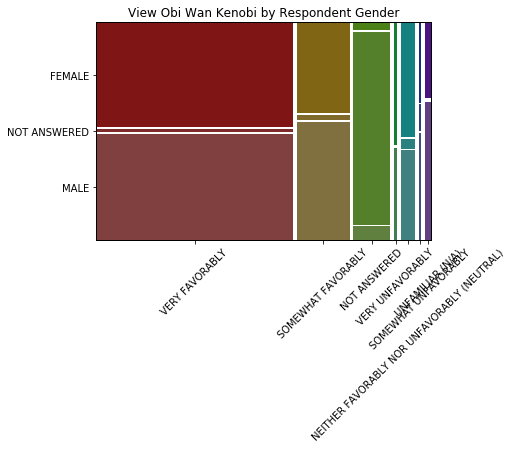


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 23             4   
MALE                                                   18             7   
NOT ANSWERED                                            2           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        67                     3                 6   
MALE                          87                     4                11   
NOT ANSWERED                   4                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   290                 4  
MALE                     292                 3  
NOT ANSWERED               9                 0  

VIEW EMPEROR PALPATINE BY RESPONDENT GENDER


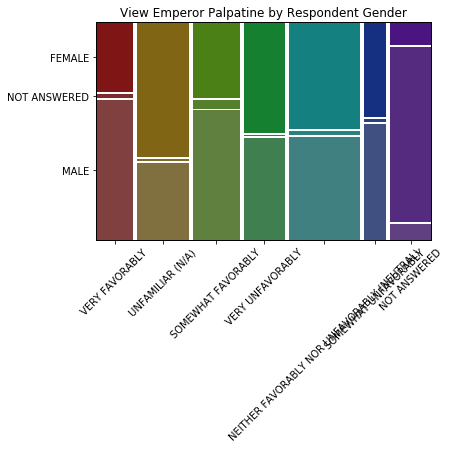


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                106            13   
MALE                                                  103             9   
NOT ANSWERED                                            4           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        50                    30                98   
MALE                          86                    37                56   
NOT ANSWERED                   6                     1                 2   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                    36                64  
MALE                      72                59  
NOT ANSWERED               2                 1  

VIEW DARTH VADER BY RESPONDENT GENDER


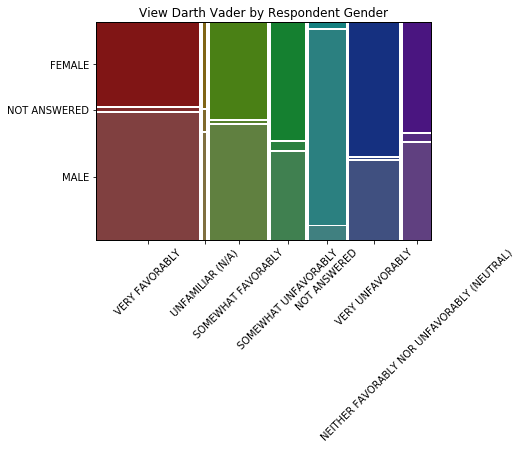


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 43             3   
MALE                                                   38             7   
NOT ANSWERED                                            3           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        77                    56                 4   
MALE                          92                    42                 5   
NOT ANSWERED                   2                     4                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   121                93  
MALE                     183                55  
NOT ANSWERED               5                 1  

VIEW LANDO CALRISSIAN BY RESPONDENT GENDER


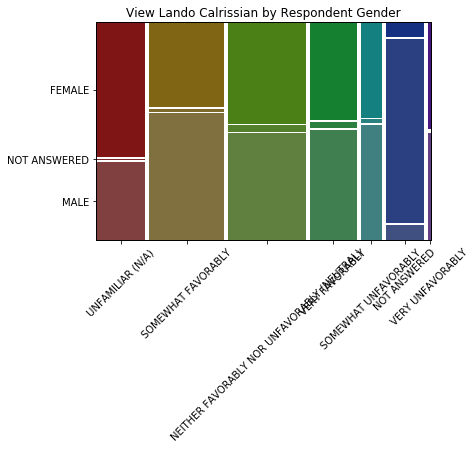


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                111             8   
MALE                                                  117             8   
NOT ANSWERED                                            7           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        88                    28                93   
MALE                         132                    34                54   
NOT ANSWERED                   3                     1                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                    65                 4  
MALE                      73                 4  
NOT ANSWERED               4                 0  

VIEW BOBA FETT BY RESPONDENT GENDER


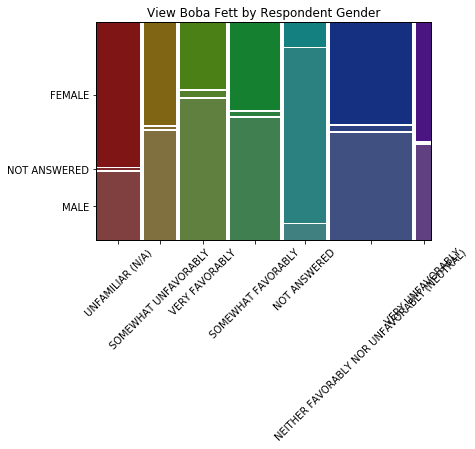


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                118            14   
MALE                                                  124             9   
NOT ANSWERED                                            6           101   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        62                    46                89   
MALE                          87                    49                42   
NOT ANSWERED                   3                     1                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                    43                25  
MALE                      91                20  
NOT ANSWERED               4                 0  

VIEW C-3P0 BY RESPONDENT GENDER


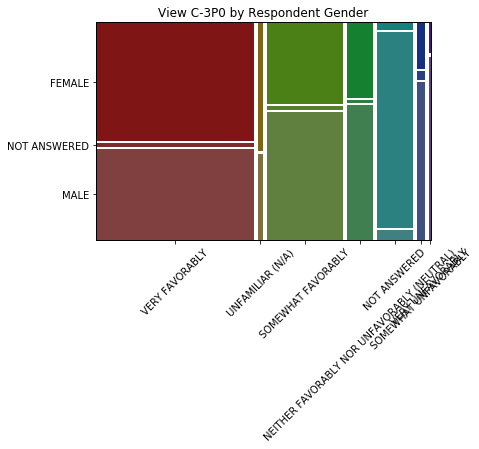


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 28             4   
MALE                                                   50             5   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        87                     5                 9   
MALE                         137                    17                 6   
NOT ANSWERED                   5                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   263                 1  
MALE                     201                 6  
NOT ANSWERED               9                 0  

VIEW R2 D2 BY RESPONDENT GENDER


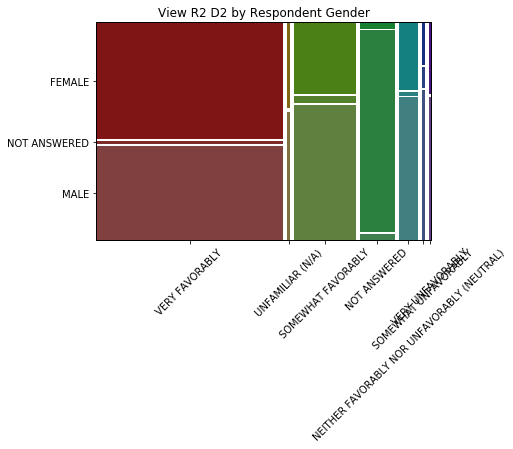


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 18             3   
MALE                                                   38             3   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        62                     2                 4   
MALE                         117                     7                 6   
NOT ANSWERED                   6                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   306                 2  
MALE                     247                 4  
NOT ANSWERED               8                 0  

VIEW JAR JAR BINKS BY RESPONDENT GENDER


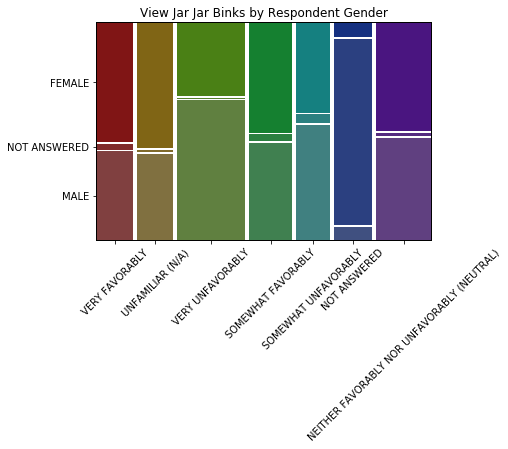


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 83             8   
MALE                                                   78             7   
NOT ANSWERED                                            3           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        67                    43                64   
MALE                          59                    55                44   
NOT ANSWERED                   4                     4                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                    62                70  
MALE                      46               133  
NOT ANSWERED               3                 1  

VIEW PADME AMIDALA BY RESPONDENT GENDER


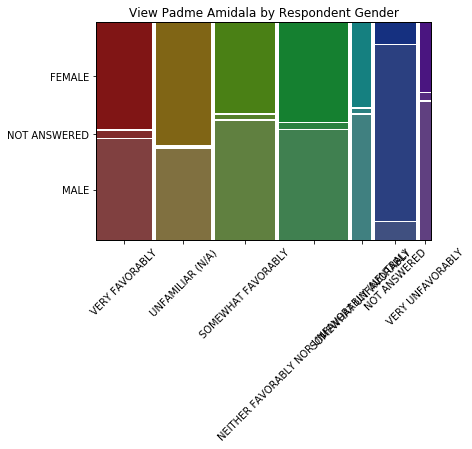


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 96            12   
MALE                                                  106            10   
NOT ANSWERED                                            5           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        77                    23                94   
MALE                         101                    34                70   
NOT ANSWERED                   4                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                    84                11  
MALE                      79                22  
NOT ANSWERED               5                 1  

VIEW YODA BY RESPONDENT GENDER


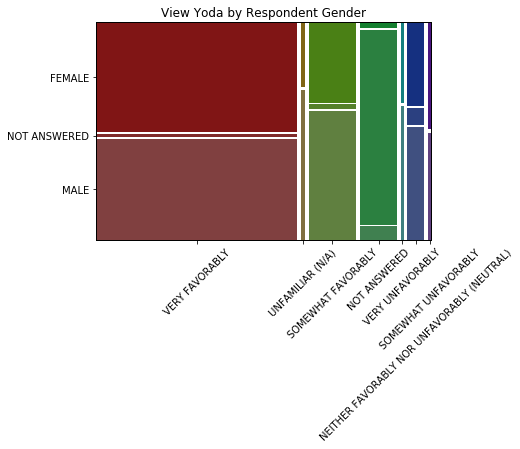


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
FEMALE                                                 20             3   
MALE                                                   27             7   
NOT ANSWERED                                            4           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
FEMALE                        54                     4                 3   
MALE                          87                     4                 7   
NOT ANSWERED                   3                     0                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
FEMALE                   310                 3  
MALE                     285                 5  
NOT ANSWERED               9                 0  

VIEW HAN SOLO BY RESPONDENT AGE


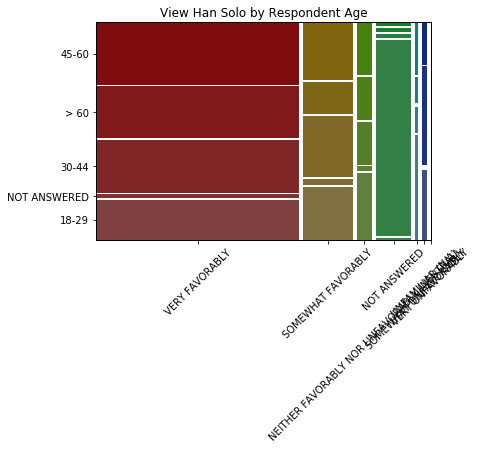


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  14             1   
30-44                                                   9             2   
45-60                                                  11             2   
> 60                                                    9             2   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         38                     4                 5   
30-44                         44                     0                 0   
45-60                         41                     2                 3   
> 60                          23                     1                 7   
NOT ANSWERED                   4                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                    117              

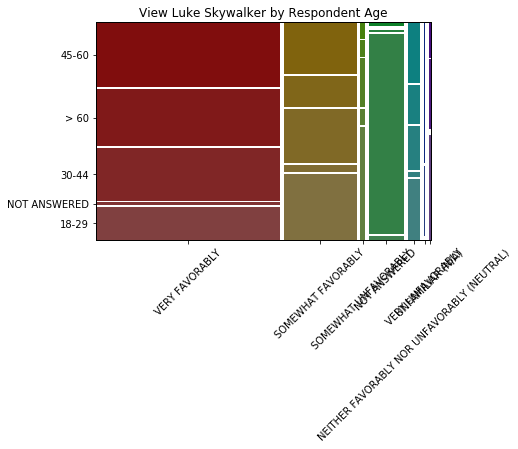


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  11             2   
30-44                                                   8             1   
45-60                                                  11             2   
> 60                                                    7             0   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         69                     7                 3   
30-44                         57                     3                 0   
45-60                         54                     1                 1   
> 60                          32                     1                 2   
NOT ANSWERED                   7                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     87              

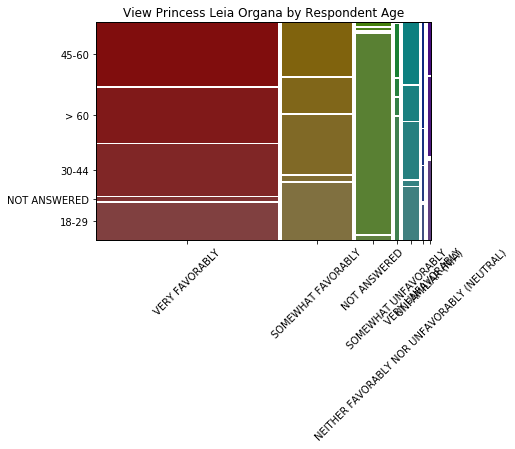


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  12             2   
30-44                                                  13             0   
45-60                                                  14             2   
> 60                                                    8             1   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         57                     7                 3   
30-44                         59                     1                 0   
45-60                         53                     0                 2   
> 60                          35                     3                 3   
NOT ANSWERED                   5                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     97              

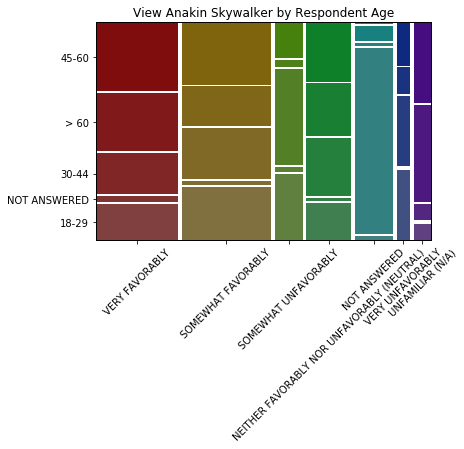


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  24             2   
30-44                                                  37             2   
45-60                                                  38             1   
> 60                                                   34             8   
NOT ANSWERED                                            2           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         68                    26                 4   
30-44                         65                    38                 4   
45-60                         79                    14                20   
> 60                          51                     3                24   
NOT ANSWERED                   5                     2                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     42              

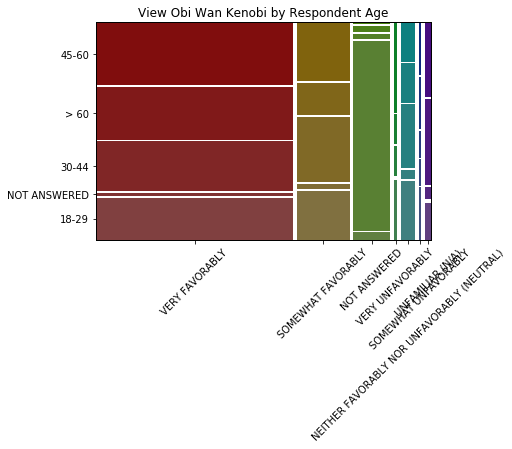


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  12             4   
30-44                                                  13             3   
45-60                                                   8             1   
> 60                                                    8             3   
NOT ANSWERED                                            2           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         37                     2                 3   
30-44                         49                     1                 1   
45-60                         44                     2                 6   
> 60                          24                     2                 7   
NOT ANSWERED                   4                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                    119              

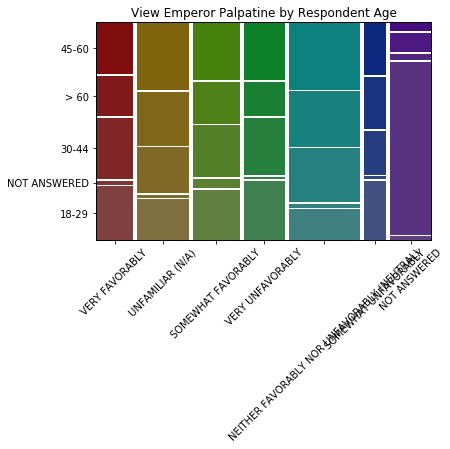


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  31             2   
30-44                                                  54             4   
45-60                                                  68             5   
> 60                                                   56            11   
NOT ANSWERED                                            4           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         34                    19                30   
30-44                         35                    14                34   
45-60                         39                    17                50   
> 60                          28                    17                40   
NOT ANSWERED                   6                     1                 2   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     28              

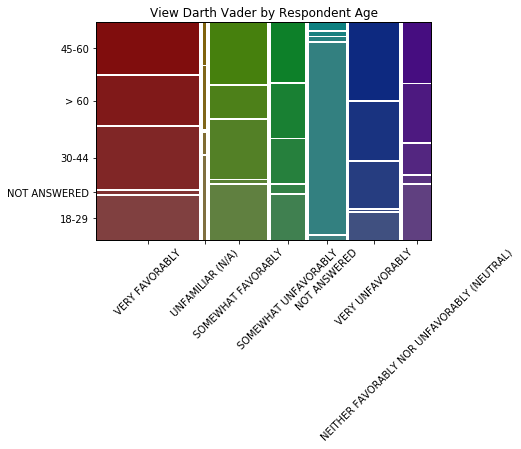


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  22             2   
30-44                                                  12             2   
45-60                                                  24             4   
> 60                                                   23             2   
NOT ANSWERED                                            3           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         45                    22                 4   
30-44                         48                    21                 0   
45-60                         50                    29                 2   
> 60                          26                    26                 3   
NOT ANSWERED                   2                     4                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     65              

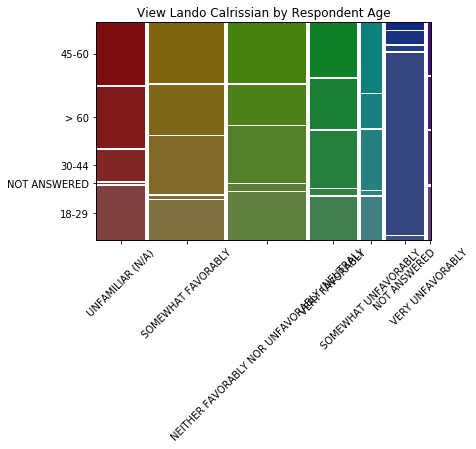


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  53             2   
30-44                                                  63             3   
45-60                                                  68             4   
> 60                                                   44             7   
NOT ANSWERED                                            7           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         42                    13                38   
30-44                         61                    18                22   
45-60                         64                    21                44   
> 60                          53                    10                43   
NOT ANSWERED                   3                     1                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     29              

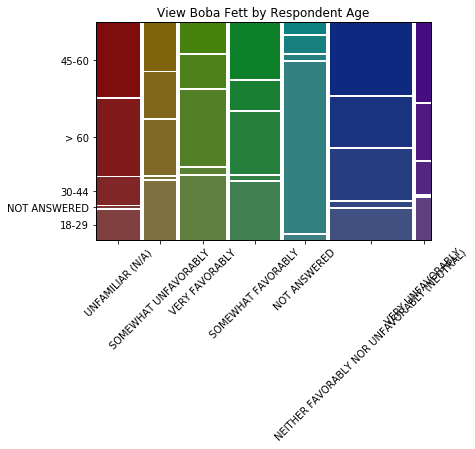


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  37             3   
30-44                                                  60             3   
45-60                                                  86             7   
> 60                                                   59            10   
NOT ANSWERED                                            6           101   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         42                    27                19   
30-44                         45                    25                17   
45-60                         41                    22                47   
> 60                          21                    21                48   
NOT ANSWERED                   3                     1                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     42              

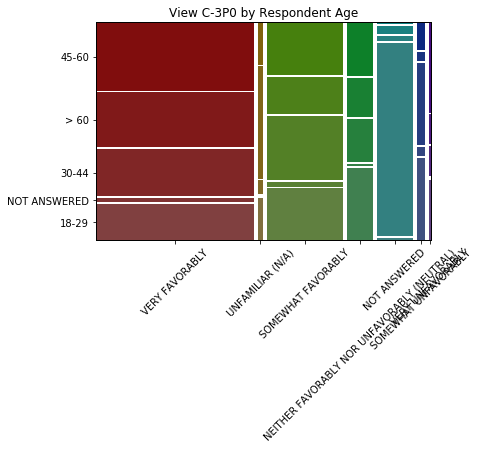


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  27             1   
30-44                                                  16             3   
45-60                                                  20             1   
> 60                                                   15             4   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         56                     9                 3   
30-44                         70                     9                 1   
45-60                         57                     3                 3   
> 60                          41                     1                 8   
NOT ANSWERED                   5                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     81              

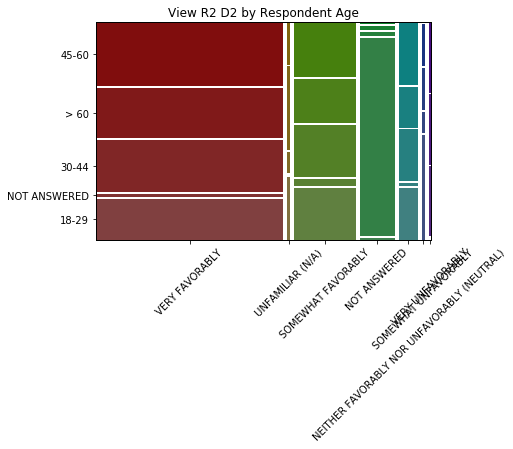


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  14             1   
30-44                                                  14             2   
45-60                                                  17             1   
> 60                                                   11             2   
NOT ANSWERED                                            1           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         46                     5                 3   
30-44                         46                     2                 1   
45-60                         48                     0                 2   
> 60                          39                     2                 4   
NOT ANSWERED                   6                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                    110              

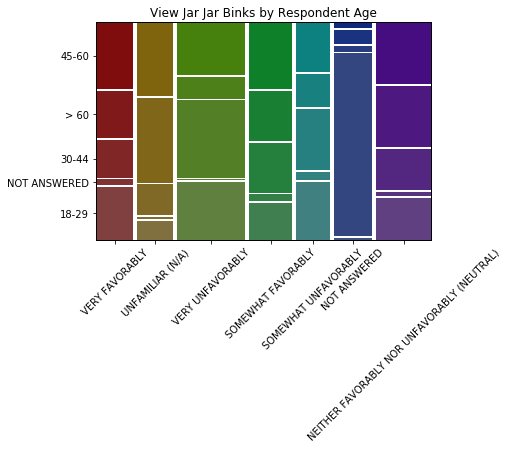


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  33             1   
30-44                                                  32             3   
45-60                                                  48             3   
> 60                                                   48             8   
NOT ANSWERED                                            3           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         23                    28                10   
30-44                         31                    30                16   
45-60                         41                    24                38   
> 60                          31                    16                44   
NOT ANSWERED                   4                     4                 1   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     28              

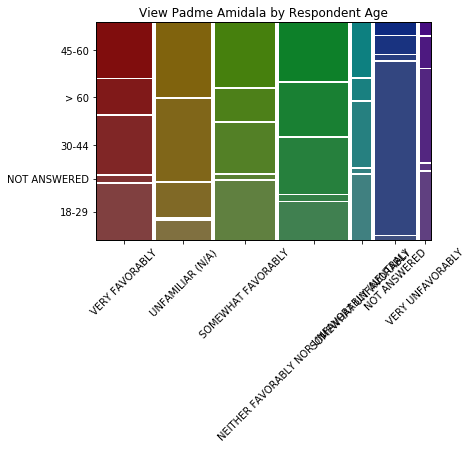


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  37             2   
30-44                                                  55             3   
45-60                                                  58             7   
> 60                                                   52            10   
NOT ANSWERED                                            5           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         51                    18                15   
30-44                         43                    18                27   
45-60                         56                    15                58   
> 60                          28                     6                64   
NOT ANSWERED                   4                     1                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                     45              

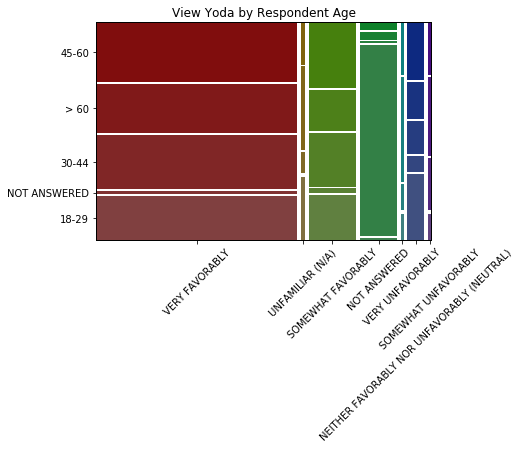


              NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
18-29                                                  16             1   
30-44                                                   8             1   
45-60                                                  14             4   
> 60                                                    9             4   
NOT ANSWERED                                            4           100   

              SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  UNFAMILIAR (N/A)  \
18-29                         31                     1                 3   
30-44                         37                     2                 1   
45-60                         45                     2                 2   
> 60                          28                     3                 4   
NOT ANSWERED                   3                     0                 0   

              VERY FAVORABLY  VERY UNFAVORABLY  
18-29                    126              

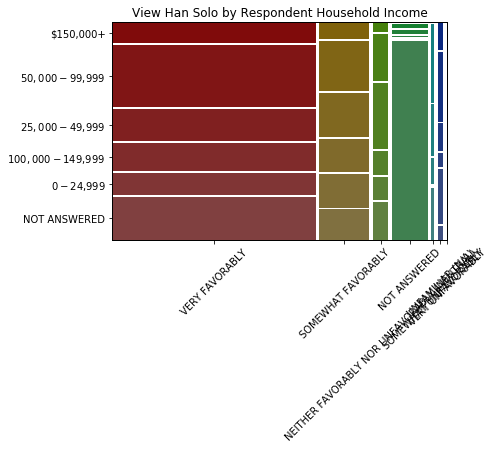


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                   5   
$100,000 - $149,999                                            5   
$150,000+                                                      2   
$25,000 - $49,999                                             14   
$50,000 - $99,999                                             10   
NOT ANSWERED                                                   8   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    0                  24                     0   
$100,000 - $149,999             1                  24                     1   
$150,000+                       0                  12                     0   
$25,000 - $49,999               2                  32                     2   
$50,000 - $99,999               2                  36                     3   
NOT ANSWERED                  102               

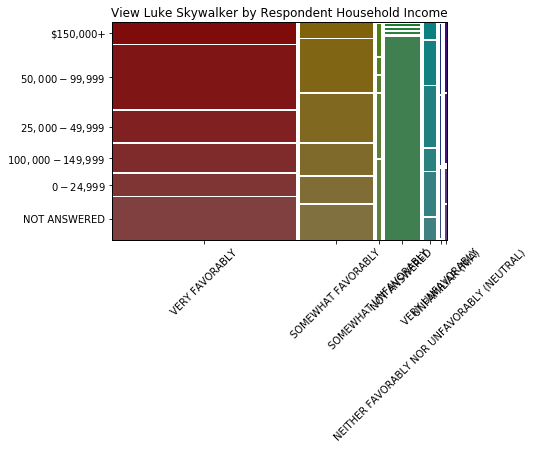


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                   8   
$100,000 - $149,999                                            4   
$150,000+                                                      3   
$25,000 - $49,999                                             11   
$50,000 - $99,999                                              8   
NOT ANSWERED                                                   4   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    0                  27                     4   
$100,000 - $149,999             1                  33                     1   
$150,000+                       0                  16                     0   
$25,000 - $49,999               1                  51                     1   
$50,000 - $99,999               1                  55                     2   
NOT ANSWERED                  102               

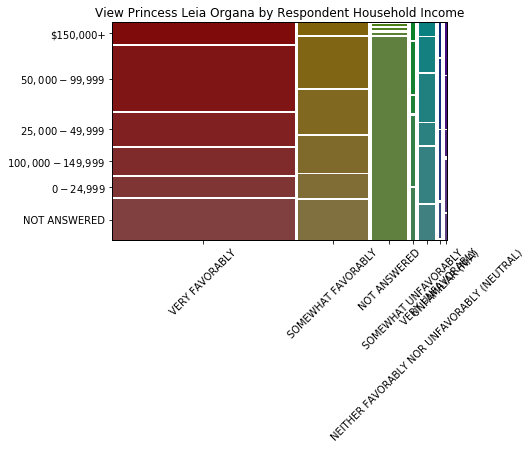


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  13   
$100,000 - $149,999                                            5   
$150,000+                                                      3   
$25,000 - $49,999                                             11   
$50,000 - $99,999                                              8   
NOT ANSWERED                                                   8   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    1                  24                     4   
$100,000 - $149,999             0                  37                     0   
$150,000+                       0                  13                     1   
$25,000 - $49,999               1                  44                     1   
$50,000 - $99,999               1                  51                     3   
NOT ANSWERED                  102               

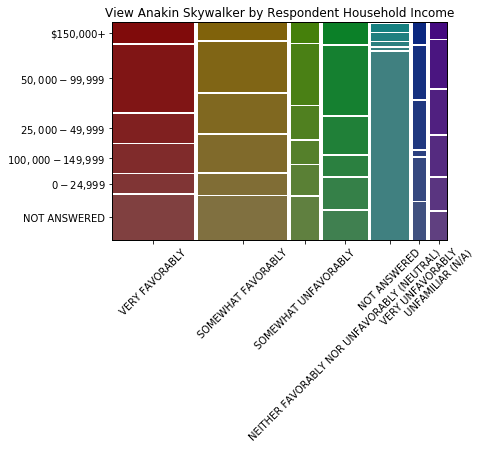


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  20   
$100,000 - $149,999                                           13   
$150,000+                                                     14   
$25,000 - $49,999                                             24   
$50,000 - $99,999                                             45   
NOT ANSWERED                                                  19   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    1                  27                    12   
$100,000 - $149,999             2                  47                     9   
$150,000+                       0                  23                     8   
$25,000 - $49,999               4                  51                    13   
$50,000 - $99,999               4                  64                    24   
NOT ANSWERED                  102               

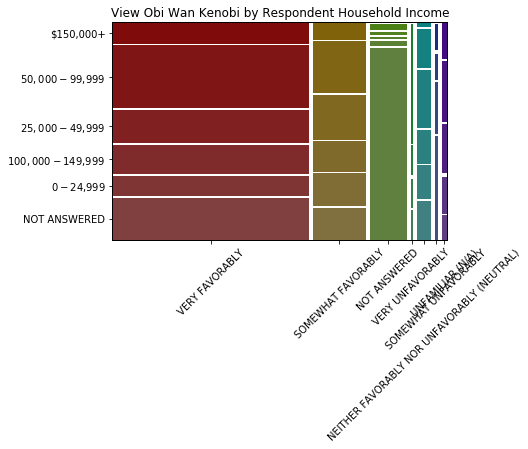


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                   7   
$100,000 - $149,999                                            7   
$150,000+                                                      1   
$25,000 - $49,999                                             12   
$50,000 - $99,999                                              8   
NOT ANSWERED                                                   8   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    3                  25                     2   
$100,000 - $149,999             1                  23                     1   
$150,000+                       0                  13                     0   
$25,000 - $49,999               2                  34                     0   
$50,000 - $99,999               3                  39                     1   
NOT ANSWERED                  102               

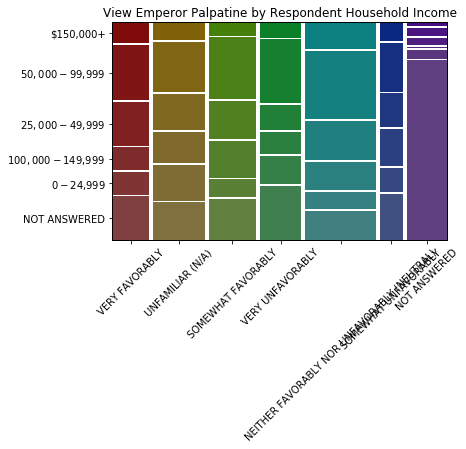


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  17   
$100,000 - $149,999                                           29   
$150,000+                                                     27   
$25,000 - $49,999                                             40   
$50,000 - $99,999                                             70   
NOT ANSWERED                                                  30   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    5                  12                     8   
$100,000 - $149,999             1                  25                    12   
$150,000+                       2                   9                     6   
$25,000 - $49,999               4                  26                    11   
$50,000 - $99,999               5                  42                    16   
NOT ANSWERED                  105               

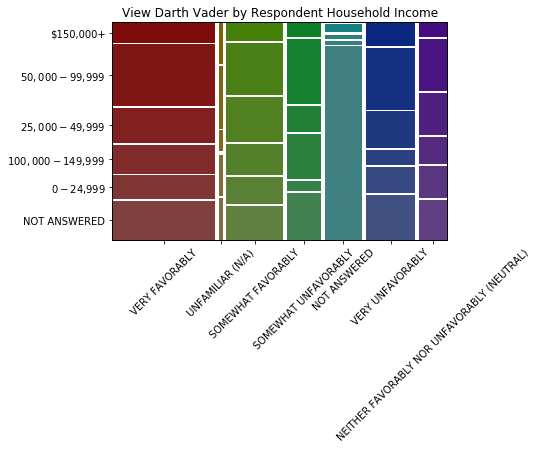


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  13   
$100,000 - $149,999                                           11   
$150,000+                                                      6   
$25,000 - $49,999                                             17   
$50,000 - $99,999                                             21   
NOT ANSWERED                                                  16   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    2                  22                     5   
$100,000 - $149,999             2                  26                    22   
$150,000+                       0                  15                     7   
$25,000 - $49,999               0                  37                    13   
$50,000 - $99,999               4                  43                    32   
NOT ANSWERED                  102               

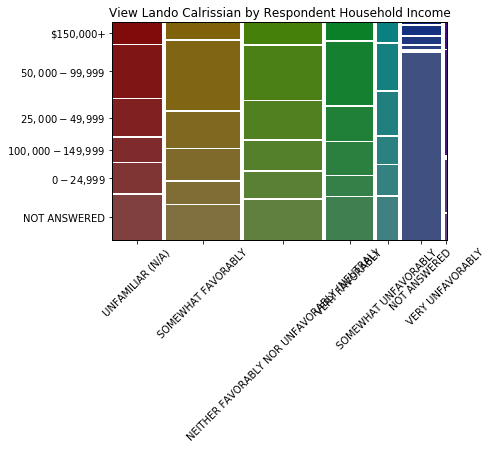


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  30   
$100,000 - $149,999                                           33   
$150,000+                                                     24   
$25,000 - $49,999                                             42   
$50,000 - $99,999                                             61   
NOT ANSWERED                                                  45   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    0                  23                     9   
$100,000 - $149,999             2                  33                     8   
$150,000+                       1                  18                     6   
$25,000 - $49,999               4                  38                    13   
$50,000 - $99,999               5                  74                    14   
NOT ANSWERED                  104               

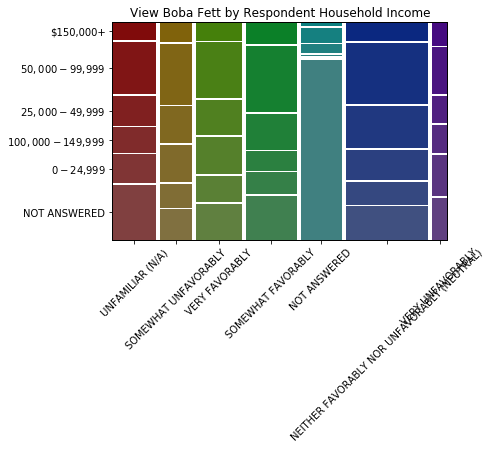


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  27   
$100,000 - $149,999                                           36   
$150,000+                                                     22   
$25,000 - $49,999                                             50   
$50,000 - $99,999                                             73   
NOT ANSWERED                                                  40   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    0                  16                    11   
$100,000 - $149,999             1                  14                    17   
$150,000+                       2                  16                     9   
$25,000 - $49,999               5                  26                    17   
$50,000 - $99,999               9                  48                    28   
NOT ANSWERED                  107               

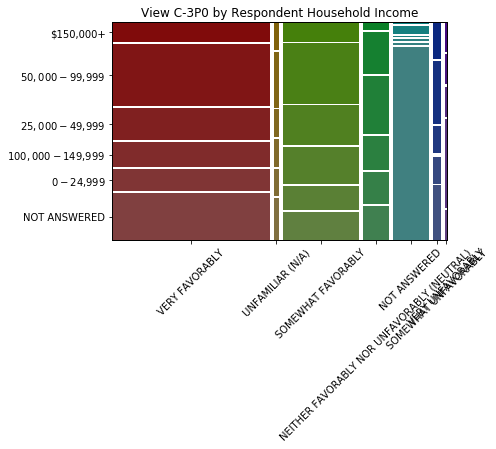


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  12   
$100,000 - $149,999                                           13   
$150,000+                                                      3   
$25,000 - $49,999                                             22   
$50,000 - $99,999                                             16   
NOT ANSWERED                                                  13   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    1                  26                     3   
$100,000 - $149,999             1                  41                     0   
$150,000+                       1                  21                     4   
$25,000 - $49,999               1                  44                     3   
$50,000 - $99,999               4                  66                     7   
NOT ANSWERED                  101               

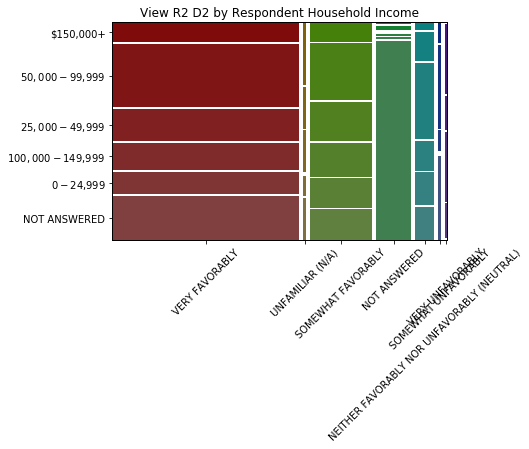


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                   9   
$100,000 - $149,999                                            8   
$150,000+                                                      2   
$25,000 - $49,999                                             21   
$50,000 - $99,999                                              8   
NOT ANSWERED                                                   9   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    1                  26                     0   
$100,000 - $149,999             1                  30                     0   
$150,000+                       1                  17                     1   
$25,000 - $49,999               0                  35                     1   
$50,000 - $99,999               2                  50                     4   
NOT ANSWERED                  101               

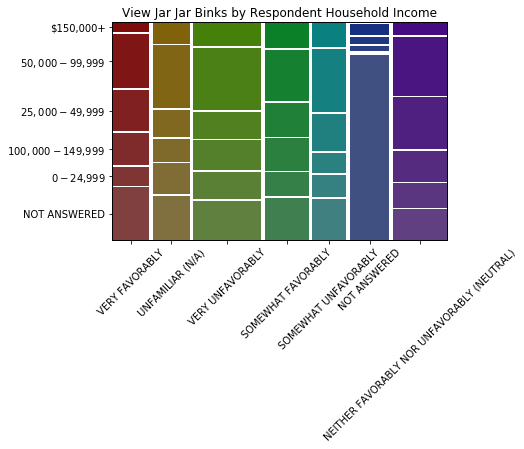


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  19   
$100,000 - $149,999                                           24   
$150,000+                                                     10   
$25,000 - $49,999                                             41   
$50,000 - $99,999                                             46   
NOT ANSWERED                                                  24   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    0                  15                    11   
$100,000 - $149,999             3                  20                    10   
$150,000+                       0                  16                    12   
$25,000 - $49,999               4                  21                    18   
$50,000 - $99,999               6                  32                    31   
NOT ANSWERED                  102               

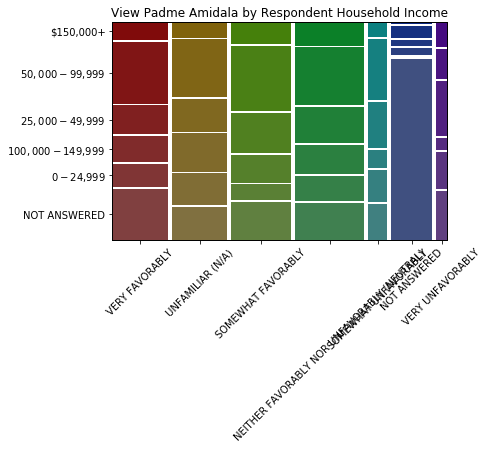


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                  25   
$100,000 - $149,999                                           29   
$150,000+                                                     23   
$25,000 - $49,999                                             36   
$50,000 - $99,999                                             57   
NOT ANSWERED                                                  37   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    0                  14                     9   
$100,000 - $149,999             4                  24                     5   
$150,000+                       1                  19                     4   
$25,000 - $49,999               4                  35                    13   
$50,000 - $99,999               7                  57                    17   
NOT ANSWERED                  106               

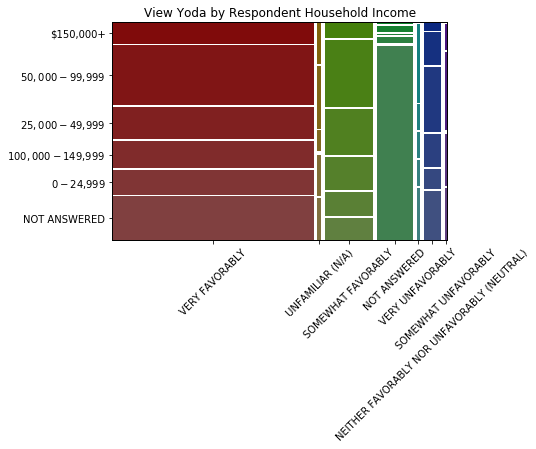


                     NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
$0 - $24,999                                                   5   
$100,000 - $149,999                                            8   
$150,000+                                                      2   
$25,000 - $49,999                                             16   
$50,000 - $99,999                                              8   
NOT ANSWERED                                                  12   

                     NOT ANSWERED  SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
$0 - $24,999                    0                  17                     2   
$100,000 - $149,999             3                  23                     0   
$150,000+                       1                  11                     0   
$25,000 - $49,999               1                  32                     3   
$50,000 - $99,999               3                  46                     1   
NOT ANSWERED                  102               

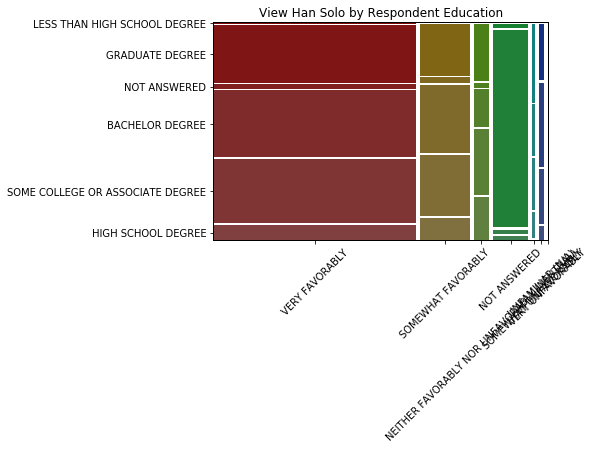


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                             8   
GRADUATE DEGREE                                                            12   
HIGH SCHOOL DEGREE                                                          9   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                1   
SOME COLLEGE OR ASSOCIATE DEGREE                                           14   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              0                  49   
GRADUATE DEGREE                              2                  37   
HIGH SCHOOL DEGREE                           2                  16   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               101                   4   
SOME COLLEG

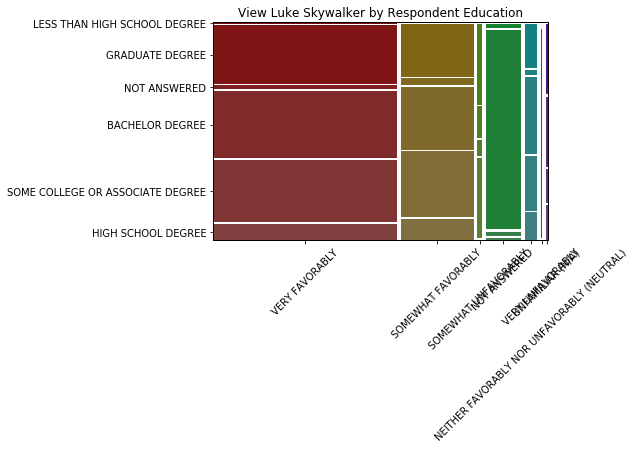


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            14   
GRADUATE DEGREE                                                             8   
HIGH SCHOOL DEGREE                                                          5   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                1   
SOME COLLEGE OR ASSOCIATE DEGREE                                           10   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              0                  66   
GRADUATE DEGREE                              2                  55   
HIGH SCHOOL DEGREE                           1                  22   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               100                   7   
SOME COLLEG

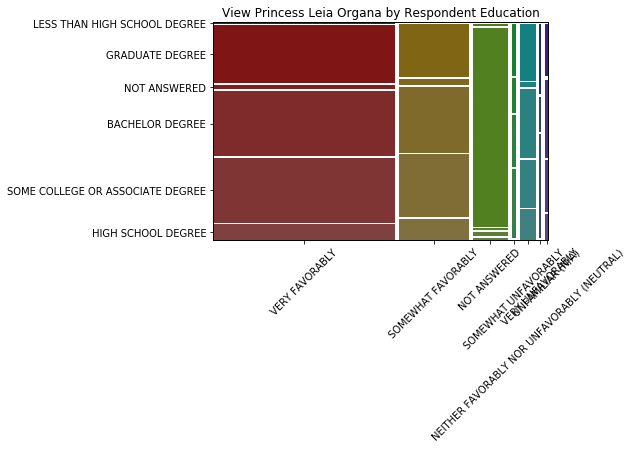


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            16   
GRADUATE DEGREE                                                            13   
HIGH SCHOOL DEGREE                                                          7   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                1   
SOME COLLEGE OR ASSOCIATE DEGREE                                           11   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              1                  66   
GRADUATE DEGREE                              1                  53   
HIGH SCHOOL DEGREE                           1                  21   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               100                   6   
SOME COLLEG

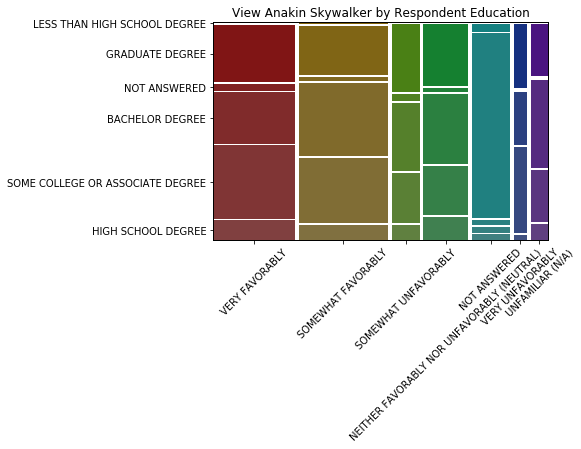


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            45   
GRADUATE DEGREE                                                            40   
HIGH SCHOOL DEGREE                                                         15   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                3   
SOME COLLEGE OR ASSOCIATE DEGREE                                           32   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              3                  94   
GRADUATE DEGREE                              4                  63   
HIGH SCHOOL DEGREE                           3                  19   
LESS THAN HIGH SCHOOL DEGREE                 0                   2   
NOT ANSWERED                               100                   6   
SOME COLLEG

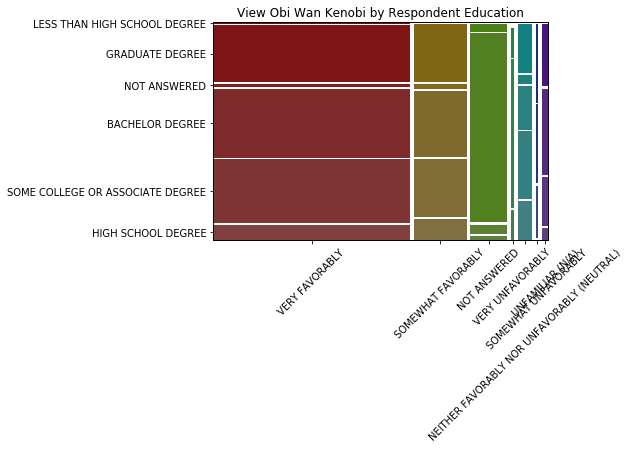


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                             9   
GRADUATE DEGREE                                                            10   
HIGH SCHOOL DEGREE                                                          8   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                2   
SOME COLLEGE OR ASSOCIATE DEGREE                                           14   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              0                  50   
GRADUATE DEGREE                              4                  44   
HIGH SCHOOL DEGREE                           2                  16   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               100                   4   
SOME COLLEG

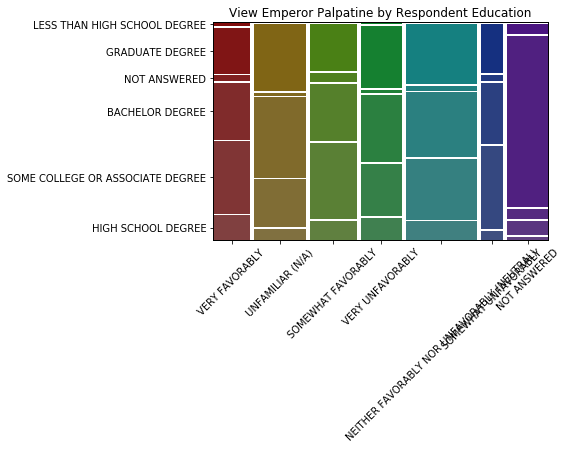


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            66   
GRADUATE DEGREE                                                            61   
HIGH SCHOOL DEGREE                                                         19   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                5   
SOME COLLEGE OR ASSOCIATE DEGREE                                           62   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              6                  39   
GRADUATE DEGREE                              6                  32   
HIGH SCHOOL DEGREE                           2                  13   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               100                   6   
SOME COLLEG

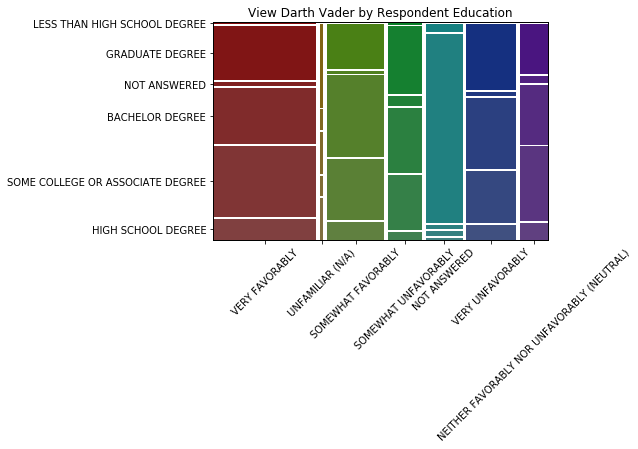


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            24   
GRADUATE DEGREE                                                            20   
HIGH SCHOOL DEGREE                                                          7   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                3   
SOME COLLEGE OR ASSOCIATE DEGREE                                           30   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              2                  67   
GRADUATE DEGREE                              4                  37   
HIGH SCHOOL DEGREE                           1                  15   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               100                   2   
SOME COLLEG

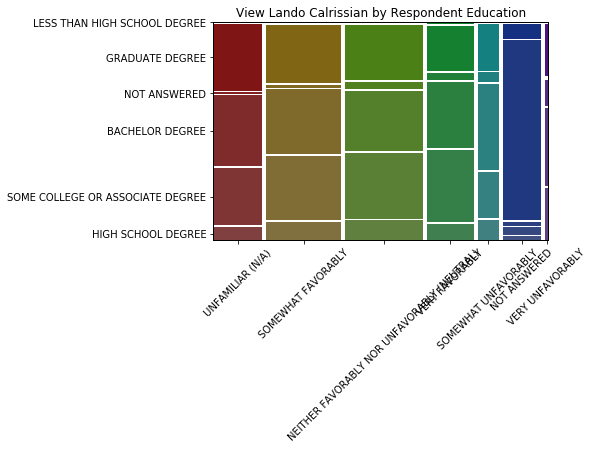


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            68   
GRADUATE DEGREE                                                            62   
HIGH SCHOOL DEGREE                                                         22   
LESS THAN HIGH SCHOOL DEGREE                                                1   
NOT ANSWERED                                                                8   
SOME COLLEGE OR ASSOCIATE DEGREE                                           74   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              2                  69   
GRADUATE DEGREE                              8                  62   
HIGH SCHOOL DEGREE                           2                  19   
LESS THAN HIGH SCHOOL DEGREE                 0                   1   
NOT ANSWERED                               100                   3   
SOME COLLEG

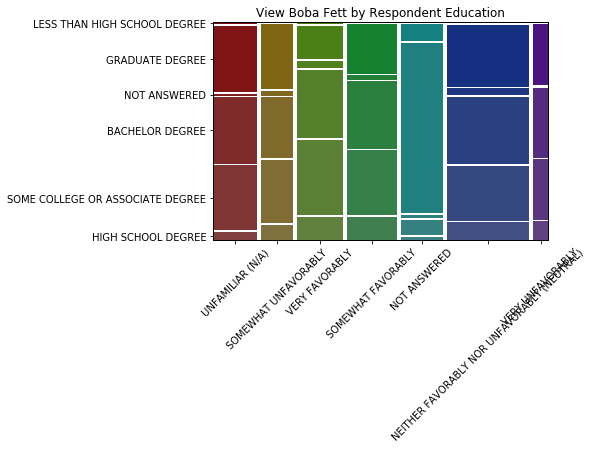


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            80   
GRADUATE DEGREE                                                            73   
HIGH SCHOOL DEGREE                                                         21   
LESS THAN HIGH SCHOOL DEGREE                                                1   
NOT ANSWERED                                                                8   
SOME COLLEGE OR ASSOCIATE DEGREE                                           65   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              2                  49   
GRADUATE DEGREE                             10                  36   
HIGH SCHOOL DEGREE                           2                  17   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               101                   3   
SOME COLLEG

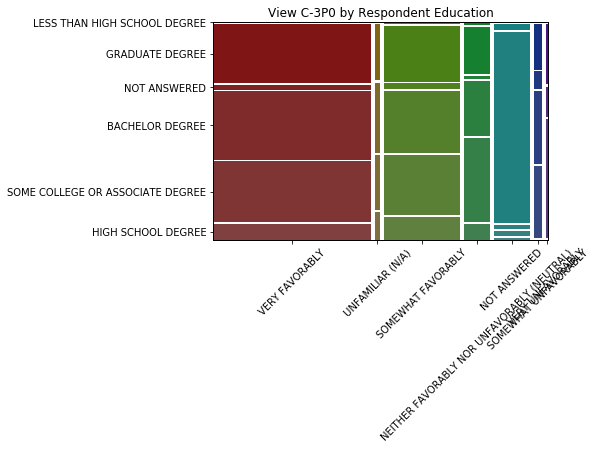


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            21   
GRADUATE DEGREE                                                            18   
HIGH SCHOOL DEGREE                                                          6   
LESS THAN HIGH SCHOOL DEGREE                                                1   
NOT ANSWERED                                                                1   
SOME COLLEGE OR ASSOCIATE DEGREE                                           32   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              2                  69   
GRADUATE DEGREE                              3                  61   
HIGH SCHOOL DEGREE                           1                  25   
LESS THAN HIGH SCHOOL DEGREE                 0                   2   
NOT ANSWERED                               100                   6   
SOME COLLEG

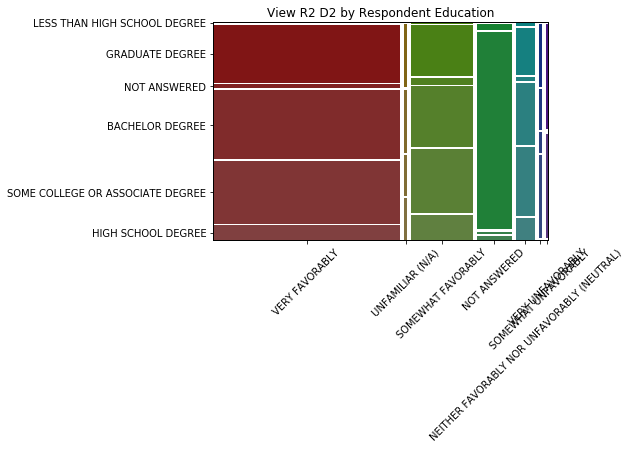


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            17   
GRADUATE DEGREE                                                            13   
HIGH SCHOOL DEGREE                                                          6   
LESS THAN HIGH SCHOOL DEGREE                                                1   
NOT ANSWERED                                                                1   
SOME COLLEGE OR ASSOCIATE DEGREE                                           19   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              0                  54   
GRADUATE DEGREE                              3                  45   
HIGH SCHOOL DEGREE                           2                  22   
LESS THAN HIGH SCHOOL DEGREE                 0                   1   
NOT ANSWERED                               100                   6   
SOME COLLEG

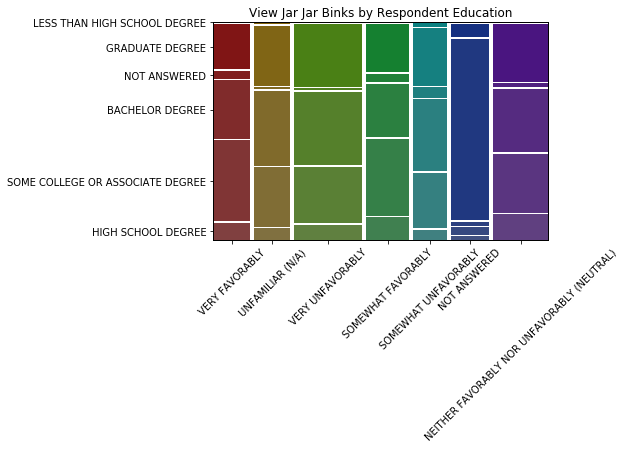


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            50   
GRADUATE DEGREE                                                            45   
HIGH SCHOOL DEGREE                                                         20   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                3   
SOME COLLEGE OR ASSOCIATE DEGREE                                           46   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              2                  33   
GRADUATE DEGREE                              7                  30   
HIGH SCHOOL DEGREE                           2                  14   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               100                   5   
SOME COLLEG

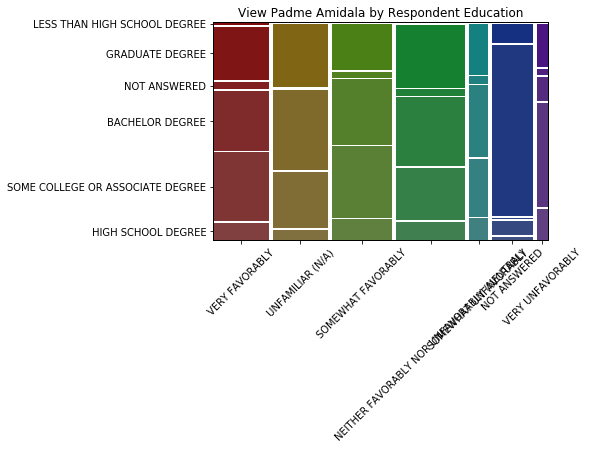


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            68   
GRADUATE DEGREE                                                            62   
HIGH SCHOOL DEGREE                                                         18   
LESS THAN HIGH SCHOOL DEGREE                                                1   
NOT ANSWERED                                                                6   
SOME COLLEGE OR ASSOCIATE DEGREE                                           52   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              1                  57   
GRADUATE DEGREE                             11                  40   
HIGH SCHOOL DEGREE                           2                  18   
LESS THAN HIGH SCHOOL DEGREE                 0                   0   
NOT ANSWERED                               100                   5   
SOME COLLEG

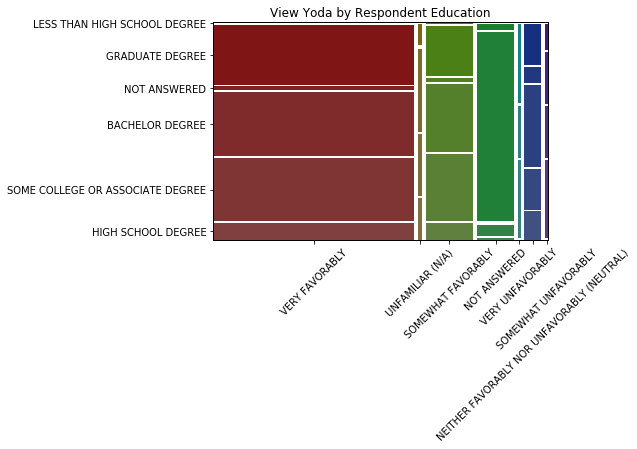


                                  NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  \
BACHELOR DEGREE                                                            20   
GRADUATE DEGREE                                                            10   
HIGH SCHOOL DEGREE                                                          7   
LESS THAN HIGH SCHOOL DEGREE                                                0   
NOT ANSWERED                                                                4   
SOME COLLEGE OR ASSOCIATE DEGREE                                           10   

                                  NOT ANSWERED  SOMEWHAT FAVORABLY  \
BACHELOR DEGREE                              0                  47   
GRADUATE DEGREE                              3                  35   
HIGH SCHOOL DEGREE                           1                  12   
LESS THAN HIGH SCHOOL DEGREE                 0                   1   
NOT ANSWERED                               100                   3   
SOME COLLEG

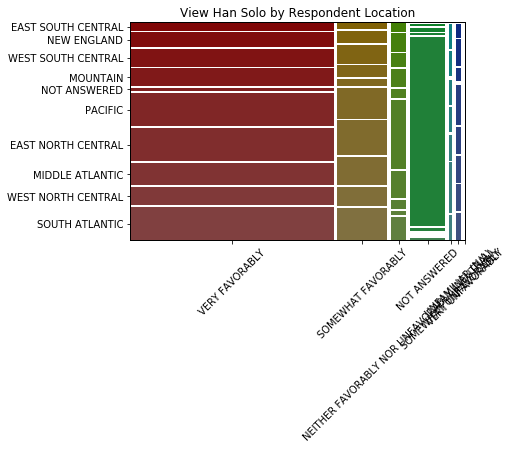


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                            6             0   
EAST SOUTH CENTRAL                                            2             0   
MIDDLE ATLANTIC                                               2             0   
MOUNTAIN                                                      4             1   
NEW ENGLAND                                                   4             1   
NOT ANSWERED                                                  2           100   
PACIFIC                                                      15             2   
SOUTH ATLANTIC                                                5             1   
WEST NORTH CENTRAL                                            1             0   
WEST SOUTH CENTRAL                                            3             2   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  26     

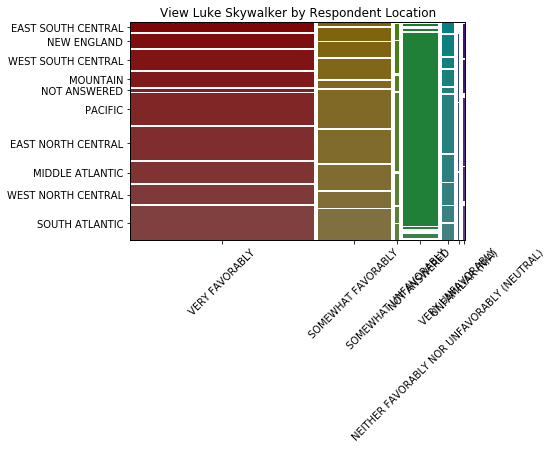


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                            5             0   
EAST SOUTH CENTRAL                                            2             0   
MIDDLE ATLANTIC                                               4             0   
MOUNTAIN                                                      3             1   
NEW ENGLAND                                                   4             1   
NOT ANSWERED                                                  1           100   
PACIFIC                                                      11             1   
SOUTH ATLANTIC                                                3             0   
WEST NORTH CENTRAL                                            3             2   
WEST SOUTH CENTRAL                                            2             0   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  36     

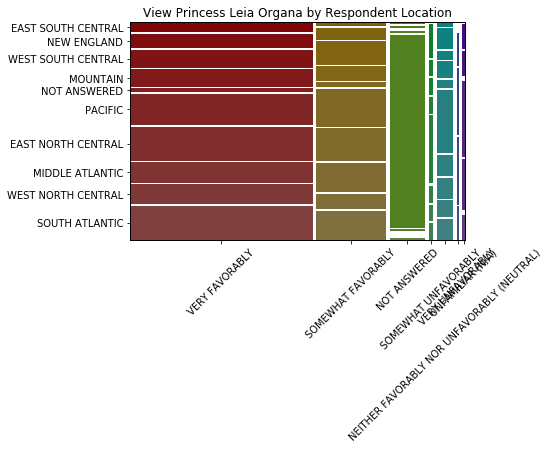


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                            5             0   
EAST SOUTH CENTRAL                                            1             1   
MIDDLE ATLANTIC                                               5             0   
MOUNTAIN                                                      4             1   
NEW ENGLAND                                                   5             1   
NOT ANSWERED                                                  2           100   
PACIFIC                                                      15             1   
SOUTH ATLANTIC                                                5             1   
WEST NORTH CENTRAL                                            4             0   
WEST SOUTH CENTRAL                                            2             0   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  34     

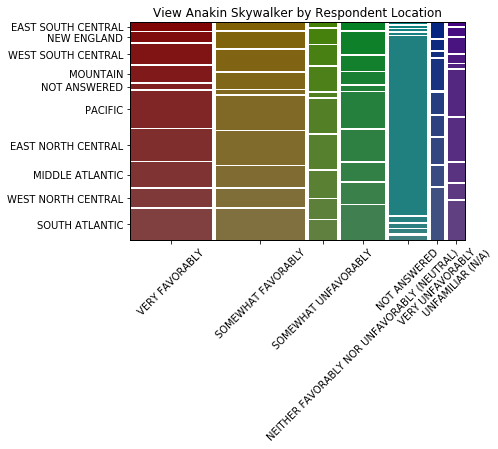


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           21             2   
EAST SOUTH CENTRAL                                            5             1   
MIDDLE ATLANTIC                                              12             2   
MOUNTAIN                                                      8             1   
NEW ENGLAND                                                  15             1   
NOT ANSWERED                                                  3           100   
PACIFIC                                                      24             3   
SOUTH ATLANTIC                                               23             2   
WEST NORTH CENTRAL                                           14             0   
WEST SOUTH CENTRAL                                           10             1   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  44     

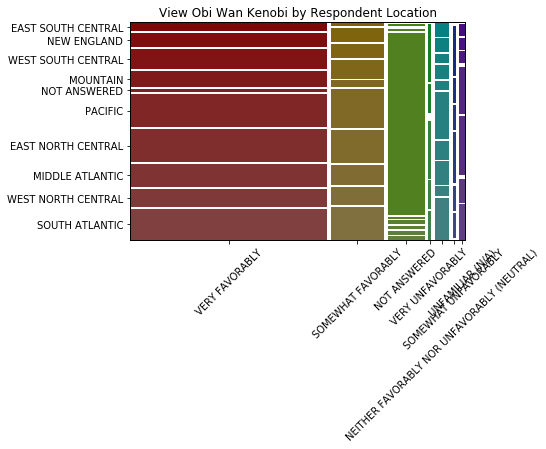


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                            4             2   
EAST SOUTH CENTRAL                                            3             0   
MIDDLE ATLANTIC                                               5             2   
MOUNTAIN                                                      3             1   
NEW ENGLAND                                                   3             1   
NOT ANSWERED                                                  2           100   
PACIFIC                                                      10             1   
SOUTH ATLANTIC                                                9             2   
WEST NORTH CENTRAL                                            2             2   
WEST SOUTH CENTRAL                                            2             0   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  26     

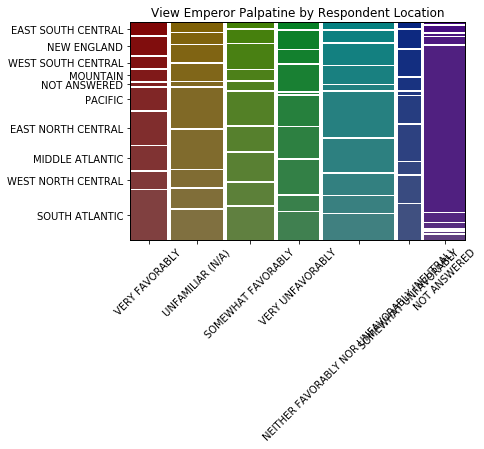


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           35             3   
EAST SOUTH CENTRAL                                            7             1   
MIDDLE ATLANTIC                                              22             0   
MOUNTAIN                                                     18             4   
NEW ENGLAND                                                  12             4   
NOT ANSWERED                                                  5           100   
PACIFIC                                                      48             5   
SOUTH ATLANTIC                                               27             3   
WEST NORTH CENTRAL                                           17             1   
WEST SOUTH CENTRAL                                           22             1   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  17     

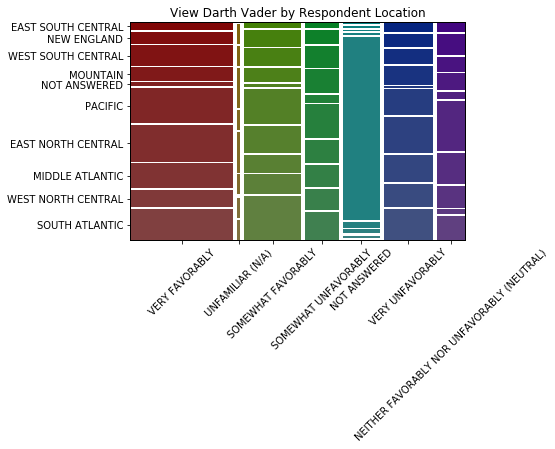


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           13             2   
EAST SOUTH CENTRAL                                            4             1   
MIDDLE ATLANTIC                                               9             0   
MOUNTAIN                                                      7             1   
NEW ENGLAND                                                   9             1   
NOT ANSWERED                                                  3           100   
PACIFIC                                                      21             3   
SOUTH ATLANTIC                                               10             0   
WEST NORTH CENTRAL                                            2             1   
WEST SOUTH CENTRAL                                            6             1   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  23     

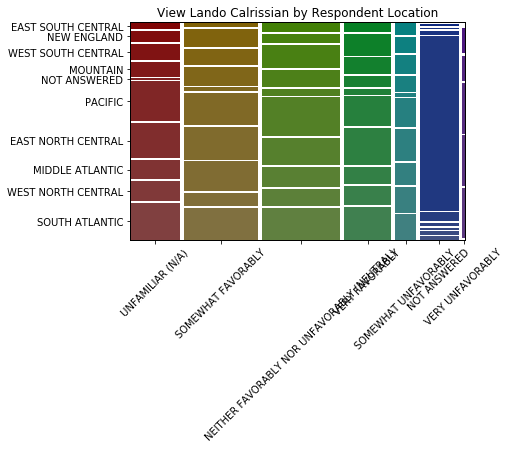


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           32             2   
EAST SOUTH CENTRAL                                           11             0   
MIDDLE ATLANTIC                                              24             1   
MOUNTAIN                                                     20             2   
NEW ENGLAND                                                  11             1   
NOT ANSWERED                                                  8           100   
PACIFIC                                                      45             5   
SOUTH ATLANTIC                                               37             2   
WEST NORTH CENTRAL                                           20             2   
WEST SOUTH CENTRAL                                           27             1   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  36     

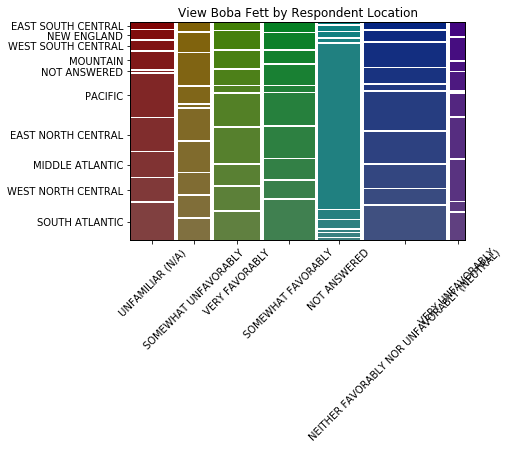


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           38             5   
EAST SOUTH CENTRAL                                            8             1   
MIDDLE ATLANTIC                                              28             1   
MOUNTAIN                                                     18             2   
NEW ENGLAND                                                  13             3   
NOT ANSWERED                                                  7           101   
PACIFIC                                                      47             5   
SOUTH ATLANTIC                                               42             1   
WEST NORTH CENTRAL                                           18             2   
WEST SOUTH CENTRAL                                           29             3   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  23     

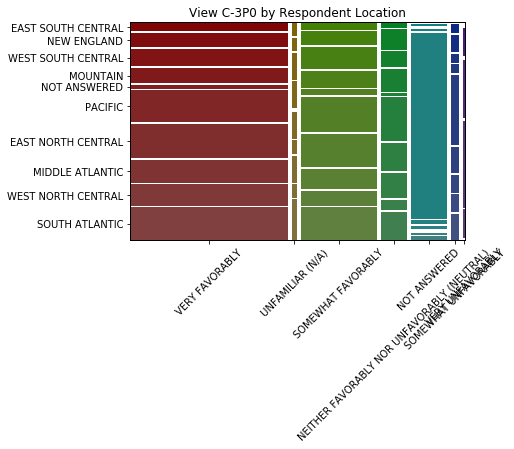


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           11             2   
EAST SOUTH CENTRAL                                            2             0   
MIDDLE ATLANTIC                                              10             0   
MOUNTAIN                                                      9             1   
NEW ENGLAND                                                   8             1   
NOT ANSWERED                                                  1           100   
PACIFIC                                                      17             2   
SOUTH ATLANTIC                                               11             2   
WEST NORTH CENTRAL                                            4             1   
WEST SOUTH CENTRAL                                            6             0   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  37     

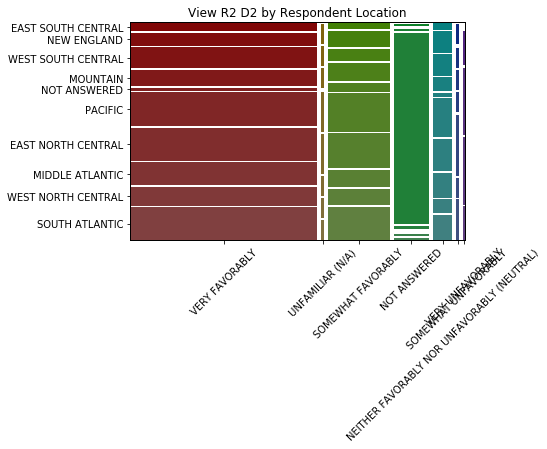


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                            9             0   
EAST SOUTH CENTRAL                                            2             0   
MIDDLE ATLANTIC                                               7             0   
MOUNTAIN                                                      4             1   
NEW ENGLAND                                                   6             1   
NOT ANSWERED                                                  1           100   
PACIFIC                                                      11             2   
SOUTH ATLANTIC                                                7             1   
WEST NORTH CENTRAL                                            4             1   
WEST SOUTH CENTRAL                                            6             0   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  32     

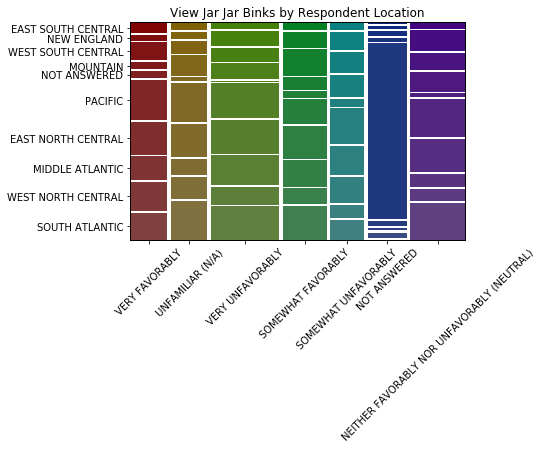


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           27             1   
EAST SOUTH CENTRAL                                            5             1   
MIDDLE ATLANTIC                                              11             0   
MOUNTAIN                                                     16             2   
NEW ENGLAND                                                  17             2   
NOT ANSWERED                                                  3           100   
PACIFIC                                                      31             3   
SOUTH ATLANTIC                                               30             0   
WEST NORTH CENTRAL                                           10             3   
WEST SOUTH CENTRAL                                           14             3   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  21     

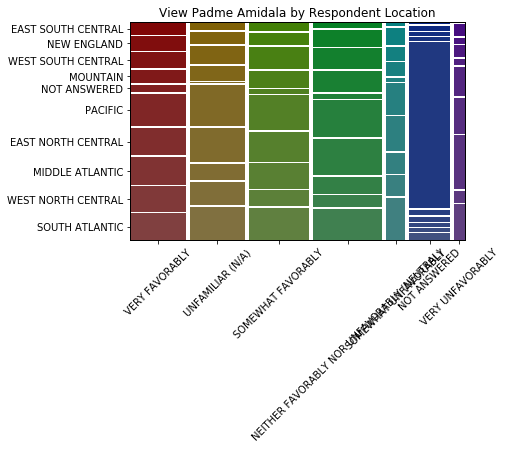


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                           37             3   
EAST SOUTH CENTRAL                                            6             1   
MIDDLE ATLANTIC                                              17             2   
MOUNTAIN                                                     22             2   
NEW ENGLAND                                                  17             3   
NOT ANSWERED                                                  5           100   
PACIFIC                                                      38             3   
SOUTH ATLANTIC                                               32             4   
WEST NORTH CENTRAL                                           12             2   
WEST SOUTH CENTRAL                                           21             2   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  27     

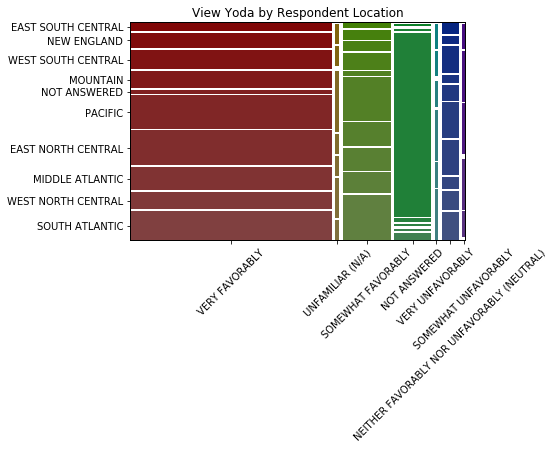


                    NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)  NOT ANSWERED  \
EAST NORTH CENTRAL                                            9             1   
EAST SOUTH CENTRAL                                            3             0   
MIDDLE ATLANTIC                                               3             0   
MOUNTAIN                                                      2             1   
NEW ENGLAND                                                   2             1   
NOT ANSWERED                                                  4           100   
PACIFIC                                                       9             2   
SOUTH ATLANTIC                                                7             4   
WEST NORTH CENTRAL                                            5             1   
WEST SOUTH CENTRAL                                            7             0   

                    SOMEWHAT FAVORABLY  SOMEWHAT UNFAVORABLY  \
EAST NORTH CENTRAL                  17     

In [118]:
# Plot a mosaic chart for combinations of all demographies and views of different characters
# Below the plot, show the number of respondents holding a particular view for a charatcer by demography

for demography in demographics:
    for character in characters:
        print("\n======================================================================")
        print(character.upper() + " BY "+ demography.upper())
        demographic_value = data_watched[demography]
        view = data_watched[character]
        mosaic_data = pd.DataFrame({'View': view, 'Demography': demographic_value})
        mosaic(mosaic_data, ['View','Demography'], title=character+' by '+demography, gap = 0.0125, label_rotation = [45,0], labelizer = lambda k: "")
        plt.show() 
        print("")
        demo = np.unique(data_watched[demography].values)
        char = np.unique(data_watched[character].values)

        matrix = np.zeros((len(np.unique(data_watched[demography].values)),len(np.unique(data_watched[character].values)))).astype(int)

        for demo_value in range(len(demo)):
            for char_value in range(len(char)):
                for respondent in range(len(data_watched['Respondent ID'])):
                    if ((data_watched[demography][respondent]) == demo[demo_value] and (data_watched[character][respondent]) == char[char_value]):
                        matrix[demo_value][char_value] += 1
         
        view_by_demo = pd.DataFrame(matrix, columns = char, index = demo)
        print(view_by_demo) 